# Mulitple Linear Regression

## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

What we need to do?

- Create a linear model that describes the effects of various features on the count.
- The model should be interpretable for the management ot understand it.

For Data Dictionary info [click here](Readme.txt).

## Preliminary Wrangling

In [1]:
# Importing essential libraries and configuring settings for data analysis and visualization
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import warnings
from IPython.display import HTML

warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Importing essential libraries and configuring settings for data analysis and visualization

# Gathering

In [2]:
df = pd.read_csv('day.csv')

In [3]:
# high-level overview of data shape and composition
print("Number of Rows in loan.csv : ",df.shape[0],"\nNumber of columns in loan.csv : ",df.shape[1])

Number of Rows in loan.csv :  730 
Number of columns in loan.csv :  16


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [5]:
print("\n DataSet : day.csv \n")
df.head(5)


 DataSet : day.csv 



instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [6]:
import pandas as pd
import re

# Read the content of the text file
with open('Readme.txt', 'r') as file:
    content = file.read()

# Extract the fields using regular expressions
fields_section = re.search(r'day\.csv have the following fields:(.*?)License', content, re.DOTALL).group(1)

# Match the field name and descriptions including multiline descriptions
fields_with_descriptions = re.findall(r'- (\w+) ?: (.*)', fields_section)
# Clean up the descriptions by removing any extra newlines and whitespace
fields_with_descriptions = [(field, re.sub(r'\s+', ' ', desc).strip()) for field, desc in fields_with_descriptions]

# Create a DataFrame with field names and descriptions
data_dictionary = pd.DataFrame(fields_with_descriptions, columns=['Field', 'Description'])

# Define weather_condition descriptions
weather_condition_description = {
    "weather_condition": {
        "1": "Clear, Few clouds, Partly cloudy, Partly cloudy",
        "2": "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
        "3": "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
        "4": "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
    }
}

# Convert weather_condition_description into DataFrame and append to fields_df
weather_condition_entry = pd.DataFrame(list(weather_condition_description.items()), columns=['Field', 'Description'])

# Append weather_condition_entry to fields_df
data_dictionary = pd.concat([data_dictionary, weather_condition_entry], ignore_index=True)

# Drop rows corresponding to values '1', '2', '3', '4' in 'Field' column
data_dictionary = data_dictionary[~data_dictionary['Field'].isin(['1', '2', '3', '4'])]

In [7]:
# Data Dictionary
data_dictionary = data_dictionary.reset_index(drop=True)
data_dictionary = data_dictionary.dropna(axis=0, how="any")
data_dictionary.shape
print("Number of Rows in Data_Dictionary.xlsx : ",data_dictionary.shape[0],"\nNumber of columns in Data_Dictionary.xlsx : ",data_dictionary.shape[1])

Number of Rows in Data_Dictionary.xlsx :  16 
Number of columns in Data_Dictionary.xlsx :  2


In [8]:
print("\nDataFrame with field names and descriptions from Readme.txt")
data_dictionary


DataFrame with field names and descriptions from Readme.txt


Field                                        Description
0             instant                                       record index
1              dteday                                               date
2              season      season (1:spring, 2:summer, 3:fall, 4:winter)
3                  yr                             year (0: 2018, 1:2019)
4                mnth                                   month ( 1 to 12)
5             holiday  weather day is a holiday or not (extracted fro...
6             weekday                                    day of the week
7          workingday  if day is neither weekend nor holiday is 1, ot...
8                temp                             temperature in Celsius
9               atemp                     feeling temperature in Celsius
10                hum                                           humidity
11          windspeed                                         wind speed
12             casual                              count of casual users
13         registered                          count of registered users
14                cnt  count of total rental bikes including both cas...
15  weather_condition  {'1': 'Clear, Few clouds, Partly cloudy, Partl...

## Observation

The dataset comprises roughly 730 records and encompasses about 16 columns.

# Assessing

In [9]:
# Check duplicated value
display(HTML(f"Number of duplicated values in the dataset : {df.duplicated().sum()}"))

In [10]:
# Check null value for each column
null_cols = df.columns[df.isnull().all(axis=0)].tolist()

print(f"List of columns with NULL's : {null_cols} \n")
print(f"total_count of columns having all NULL values : {len(null_cols)}")

List of columns with NULL's : [] 

total_count of columns having all NULL values : 0


In [11]:
# Find the uniqueness of a column in data frame

uniq_list = df.columns[(df.nunique() == 1)].tolist()
print("List of columns that have same value for all records : ", uniq_list )
print("\ntotal_count of columns that have same value for all records : ", len(uniq_list) )

List of columns that have same value for all records :  []

total_count of columns that have same value for all records :  0


In [12]:
# Function that lists the categorical_values in a column
def categorical_values(df, column_list):
    for index, column in enumerate(column_list):
         display(HTML(f"{index+1} .Categorical column \"{column}\" and their values in the dataset day.csv"))
         value_total_counts_df = df[column].value_counts().reset_index()
         value_total_counts_df.columns = ['Value', 'total_count']
         display(HTML(value_total_counts_df.to_html(index=False)))

# columns that have Categorical variables in the dataset
column_list = ['season', 'mnth', 'yr', 'workingday', 'weathersit', 'holiday','weekday']
categorical_values(df, column_list)

## Observation

1. The dataset does not contain any duplicate rows.
2. The dataset does not contain any column that has all NULL values.
4. The dataset comprises approximately 7 categorical variables: 'season', 'mnth', 'yr', 'is_workingday', 'weather_condition'.

# Cleaning

1. Remove columns that do not contribute to data analysis
2. Rename the columns for clarity by using full terms instead of abbreviations.
3. Replacing categorical data with more meaningful labels.
4. Convert the data type of columns having categorical value to categorical data types.
5. Handle the outliers in the data.

In [13]:
# Creating a copy of the dataset to preserve the original data
df_clean = df.copy()
print("Creating a copy of the dataset to preserve the orignal data \nNew dataframe : df_clean")

Creating a copy of the dataset to preserve the orignal data 
New dataframe : df_clean


In [14]:
# Display the dimensions of the copied DataFrame (number of rows, number of columns)
print("Number of Rows in loan.csv : ",df_clean.shape[0],"\nNumber of columns in loan.csv : ",df_clean.shape[1])

Number of Rows in loan.csv :  730 
Number of columns in loan.csv :  16


##### Define

1. Remove columns that do not contribute to data analysis:
    - Drop 'instant' column because it serves as an index and provides no analytical value.
    - Drop 'dteday' column since its components ('yr', 'mnth', 'weekday') already cover its information

##### Code

In [15]:
# Drop 'instant' column as it serves only as an index and does not contribute to our analysis.
# Drop 'dteday' column since 'mnth' (month) and 'weekday' already provide sufficient temperatureoral information
# Drop 'casual' and 'registered' column since the total of both is represented as 'total_count'

# List of columns to drop from df and bike_df
columns_to_drop = ['instant', 'dteday','casual','registered']

# Drop rows from fields_df where Field column matches columns_to_drop
for col in columns_to_drop:
    print(f"Dropping '{col}' column...")
    df_clean.drop([col], axis=1, inplace=True)
    print(f"Dropping rows from data_dictionary where Field matches '{col}'\n")
    data_dictionary = data_dictionary[data_dictionary['Field'] != col]

data_dictionary = data_dictionary.reset_index(drop=True)

Dropping 'instant' column...
Dropping rows from data_dictionary where Field matches 'instant'

Dropping 'dteday' column...
Dropping rows from data_dictionary where Field matches 'dteday'

Dropping 'casual' column...
Dropping rows from data_dictionary where Field matches 'casual'

Dropping 'registered' column...
Dropping rows from data_dictionary where Field matches 'registered'



##### Test

In [16]:
# Check if columns are dropped successfully
dropped_columns = ['instant', 'dteday','casual','registered']
for col in dropped_columns:
    if col not in df_clean.columns and data_dictionary[data_dictionary['Field'] == col].empty:
        print(f"Column '{col}' successfully dropped.")
    else:
        print(f"Column '{col}' not dropped.")

Column 'instant' successfully dropped.
Column 'dteday' successfully dropped.
Column 'casual' successfully dropped.
Column 'registered' successfully dropped.


So from the above correlation formed we can clearly see that season,month and weekday which are supposed to be non-numerical are numerical which should be changed

##### Define

2. Rename the columns for clarity by using full terms instead of abbreviations.

##### Code

In [17]:
# Rename columns for clarity by replacing abbreviations with full terms.
new_mapping = {'yr': 'year',
               'mnth': 'month',
               'hum': 'humidity',
               'temp':'temperature',
               'atemp': 'feel_temperature',
               'cnt':'total_count',
               'weathersit':'weather_condition',
               'workingday':'is_workingday',
               'holiday':'is_holiday'
              }

print("Renaming columns for clarity by replacing abbreviations with full terms.")
df_clean = df_clean.rename(columns=new_mapping)

Renaming columns for clarity by replacing abbreviations with full terms.


##### Test

In [18]:
df_clean.columns

Index(['season', 'year', 'month', 'is_holiday', 'weekday', 'is_workingday',
       'weather_condition', 'temperature', 'feel_temperature', 'humidity',
       'windspeed', 'total_count'],
      dtype='object')

##### Define

3. Replacing categorical data with more meaningful labels

##### Code

In [19]:
print("Replacing categorical data with more meaningful labels:\n")

# Replace numeric season values with corresponding labels
df_clean['season'].replace({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}, inplace=True)
print("1. Replaced season values.")

# Replace weather_condition values with descriptive categories
df_clean['weather_condition'].replace({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'}, inplace=True)
print("2. Replaced weather_condition values.")

# Replace numeric month values with corresponding labels
df_clean['month'].replace({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}, inplace=True)
print("3. Replaced month values.")

# Replace weekday values with corresponding day names
df_clean['weekday'].replace({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace=True)
print("4. Replaced weekday values.")

# Replace year values with corresponding years
df_clean['year'].replace({0: '2018', 1: '2019'}, inplace=True)
print("5. Replaced year values.")

# Replace is_holiday values with True or False
df_clean['is_holiday'].replace({0: 'False', 1: 'True'}, inplace=True)
print("6. Replaced is_holiday values.")

# Replace year values with True or False
df_clean['is_workingday'].replace({0: 'False', 1: 'True'}, inplace=True)
print("7. Replaced is_workingday values.")

Replacing categorical data with more meaningful labels:

1. Replaced season values.
2. Replaced weather_condition values.
3. Replaced month values.
4. Replaced weekday values.
5. Replaced year values.
6. Replaced is_holiday values.
7. Replaced is_workingday values.


##### Test

In [20]:
column_list = ['season', 'weather_condition', 'month', 'weekday', 'year']
categorical_values(df_clean, column_list)

##### Define

4. Convert the data type of columns having categorical value to categorical data types.

##### Code

In [21]:
# Convert to Categories
columns = ['season', 'month', 'year', 'is_workingday', 'weather_condition', 'is_holiday', 'weekday']
print(f"Converting columns {', '.join(columns)} to the Category data type...")
df_clean[columns] = df_clean[columns].astype("category")
print("Conversion completed.\n")

Converting columns season, month, year, is_workingday, weather_condition, is_holiday, weekday to the Category data type...
Conversion completed.



##### Test

In [22]:
# Validating data types
print("Validating data types:")
print(df_clean.dtypes)

Validating data types:
season               category
year                 category
month                category
is_holiday           category
weekday              category
is_workingday        category
weather_condition    category
temperature           float64
feel_temperature      float64
humidity              float64
windspeed             float64
total_count             int64
dtype: object


##### Define

5. Handle the outliers in the data.

##### Code

In [23]:
# Treating outliers
# Plots boxplots to examine outliers in the specified columns of the given dataframe.
def outlier_plot(dataframe, column_list):
    # Define color palette
    color_palette = ['skyblue', 'salmon', 'lightgreen', 'orchid', 'goldenrod', 'cornflowerblue', 'darkorange']

    # Iterate over each column in the list
    for index, value in enumerate(column_list):
        # Define title for the subplot
        title_name = f"Outlier Examination for {value} column"

        # Create subplot
        plt.subplot(3, 3, index+1)
        plt.subplots_adjust(hspace=0.4, wspace=0.4)

        # Plot boxplot
        dataframe[value].plot(figsize=(12, 10), kind='box', color=color_palette[index])

        # Set title and font size
        plt.title(title_name, fontsize=10)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

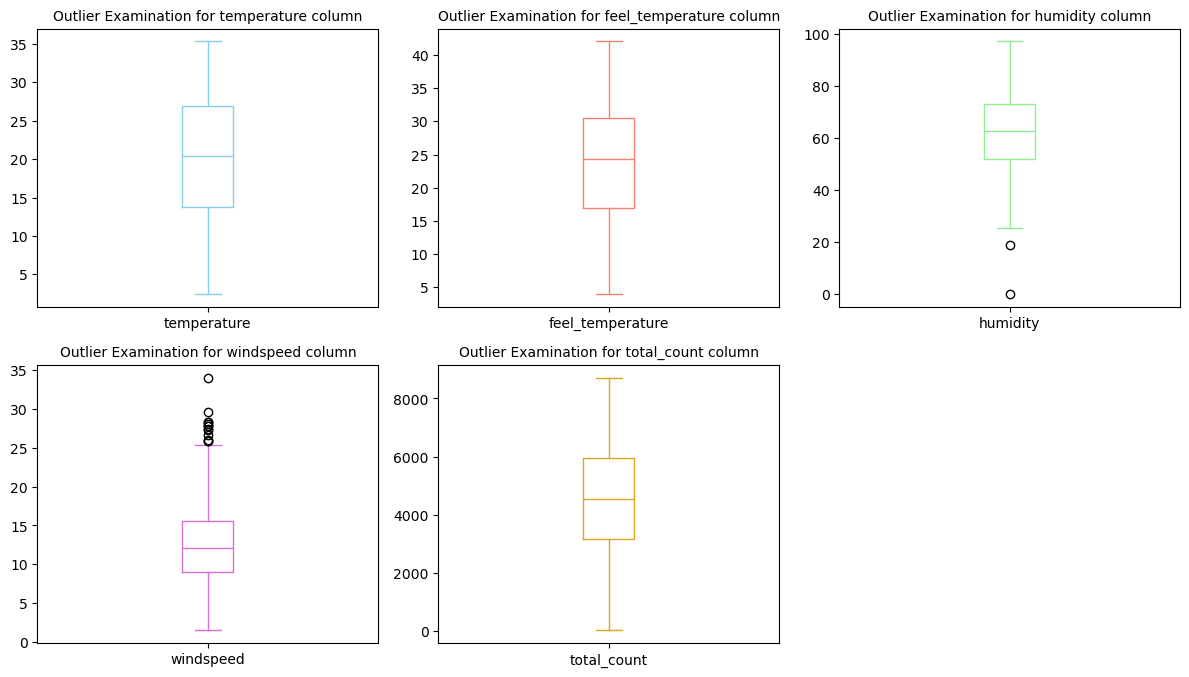

<Figure size 640x480 with 0 Axes>

In [24]:
cols = ['temperature', 'feel_temperature', 'humidity', 'windspeed', 'total_count']
display(HTML("Plots boxplots to examine outliers in the specified columns of the given dataframe.\n"))
outlier_plot(df_clean, cols)
plt.show()
plt.tight_layout()

##### No outliers were found in the data, so there is no need to perform outlier removal.

In [25]:
# Overview of the current shape of the datasest.
print("Number of Rows in df_clean after Cleaning : ",df_clean.shape[0],"\nNumber of columns in df_clean after Cleaning: ",df_clean.shape[1])

Number of Rows in df_clean after Cleaning :  730 
Number of columns in df_clean after Cleaning:  12


### Below is the data dictionary for the remaining columns on which we will conduct the analysis.

In [26]:
html_table = data_dictionary.to_html().replace('<table', '<table style="font-size: 15px;"')
# Display HTML table
display(HTML(html_table))

In [27]:
# Overview of the current shape of the datasest.
print("Number of Rows in df_clean after Cleaning : ",df_clean.shape[0],"\nNumber of columns in df_clean after Cleaning: ",df_clean.shape[1])

Number of Rows in df_clean after Cleaning :  730 
Number of columns in df_clean after Cleaning:  12


# Exploratory Data Analisys

#### __Univariate Analysis__ 
  → Mean, Median, Max, Min, Std, Variance, total_count
  → Distribution ( Histogram, total_countPlot, BoxPlot)
#### __Bivariate Analysis__
  → Relationship Between 2 Variables ( ScatterPlot, BoxPlot, BarPlot etc)
#### __Multivariate Analysis__
  → Relationship Between more variables ( Heatmap etc.)

In [28]:
numerical_columns  = df_clean.select_dtypes(include=['float','int']).columns.tolist()
categorical_columns = df_clean.select_dtypes(include=['category']).columns.tolist()
print("Numerical_Columns :", numerical_columns)
print("Cateogrical_Columns :", categorical_columns)

Numerical_Columns : ['temperature', 'feel_temperature', 'humidity', 'windspeed', 'total_count']
Cateogrical_Columns : ['season', 'year', 'month', 'is_holiday', 'weekday', 'is_workingday', 'weather_condition']


# Univariate Exploration

In [29]:
# Class for performing univariate analysis on a specified column in a DataFrame.
class UnivariateAnalysis:
    # Initializes the UnivariateAnalysis object with the given DataFrame.
    def __init__(self, dataframe,column_name):       
        self.dataframe = dataframe
        self.column_name = column_name
        print(f"Initiating detailed analysis of {column_name}...")
        print(f"\nStatistical summary for {self.column_name}:\n{self.dataframe[self.column_name].describe()}")
        mode = self.dataframe[self.column_name].mode()[0]
        print(f"\nThe mode of {self.column_name} is: {mode}\n")

    # Performs univariate analysis on the specified column with bins.
    def analyze_with_bins(self, bin_range=None, discrete=False, value_total_counts=False):
        sns.set_style('whitegrid')
        plt.figure(figsize=(12, 6))
        print(f"total_count summary for {self.column_name}:\n{self.dataframe[self.column_name].value_counts()}") if value_total_counts else ''
        sns.histplot(data=self.dataframe, x=self.column_name, bins=bin_range, discrete=discrete, kde=True, color='skyblue') if bin_range else sns.histplot(data=self.dataframe, x=self.column_name, kde=True, color='skyblue')
        plt.title(f'Distribution of {self.column_name}', fontsize=16, fontweight='bold')
        
        plt.xlabel(self.column_name, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(bin_range, rotation=45, fontsize=12) if bin_range else plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)

        plt.tight_layout()
        plt.show()

    # Performs univariate analysis on the specified column without bins.
    def analyze_without_bins(self):
        sns.set_style('whitegrid')
    
        fig, ax = plt.subplots(1, 2, figsize=(16, 6))
        
        sns.histplot(data=self.dataframe, x=self.column_name, ax=ax[0], kde=True, color='salmon')
        ax[0].set_title(f'{self.column_name} Histogram', fontsize=16, fontweight='bold')
    
        sns.boxplot(data=self.dataframe, y=self.column_name, ax=ax[1], palette='muted')
        ax[1].set_title(f'{self.column_name} Box Plot', fontsize=16, fontweight='bold')
    
        for axis in ax:
            axis.set_xlabel(self.column_name, fontsize=14)
            axis.set_ylabel('Frequency', fontsize=14)
            axis.tick_params(axis="x", rotation=45, labelsize=12)
            axis.tick_params(axis="y", labelsize=12)
    
        plt.tight_layout()
        plt.show()

Initiating detailed analysis of temperature...

Statistical summary for temperature:
count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temperature, dtype: float64

The mode of temperature is: 10.899153



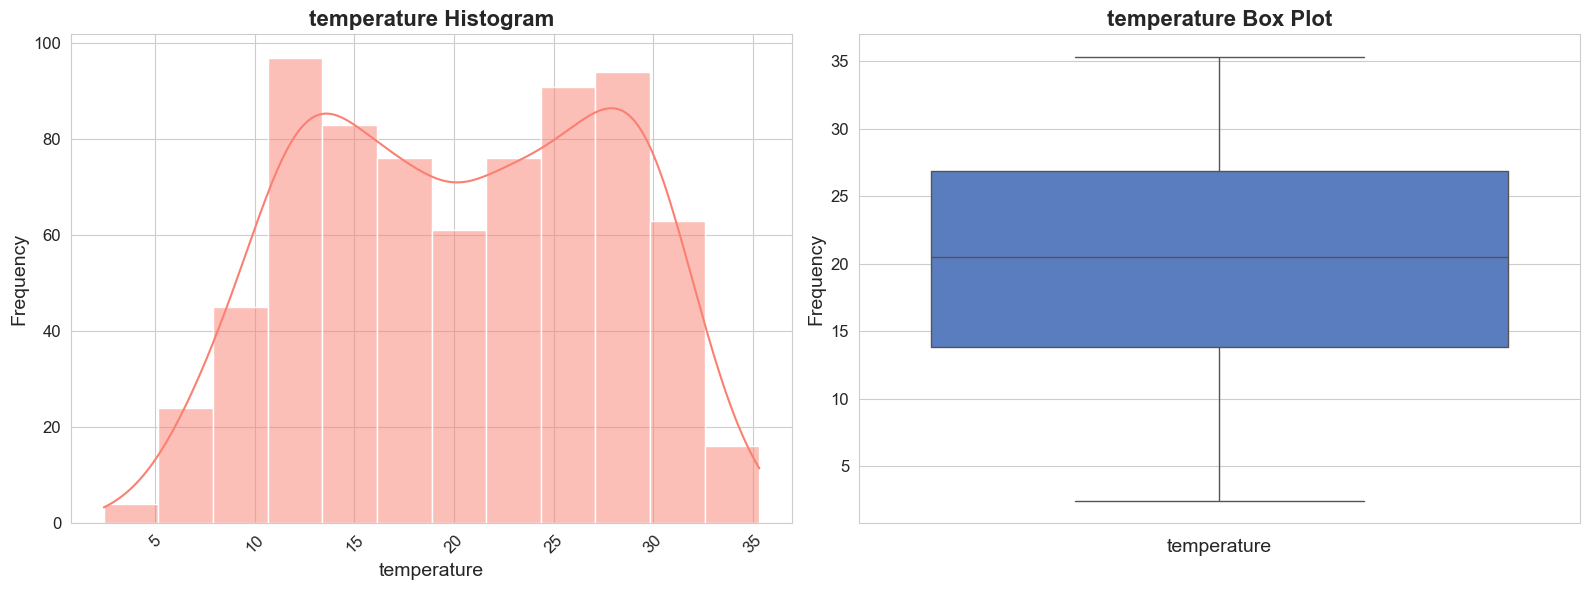

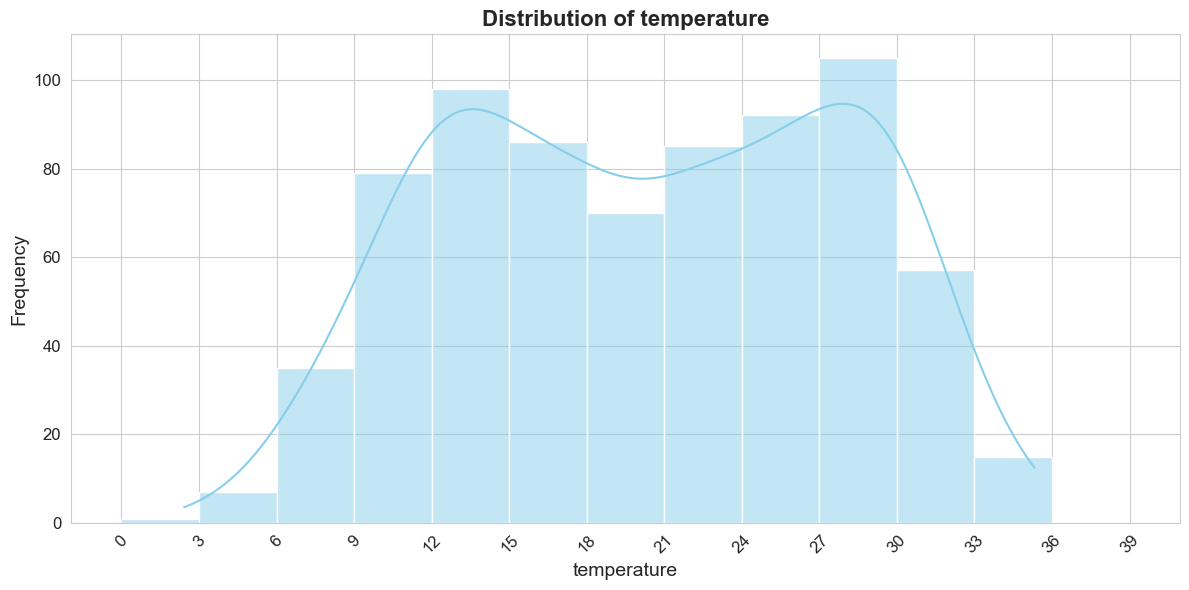

In [30]:
univariate_analysis = UnivariateAnalysis(df_clean, 'temperature')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(0, 40, 3))

### Observations

**temperatureerature (temperature)**: The temperatureerature data appears normally distributed between 10 and 30 degrees with a peak around the center. The boxplot confirms this, showing a symmetrical spread with no outliers. In other words, most temperatureeratures cluster around the middle, with a few falling outside the 10-30 degree range.

Initiating detailed analysis of feel_temperature...

Statistical summary for feel_temperature:
count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: feel_temperature, dtype: float64

The mode of feel_temperature is: 32.7344



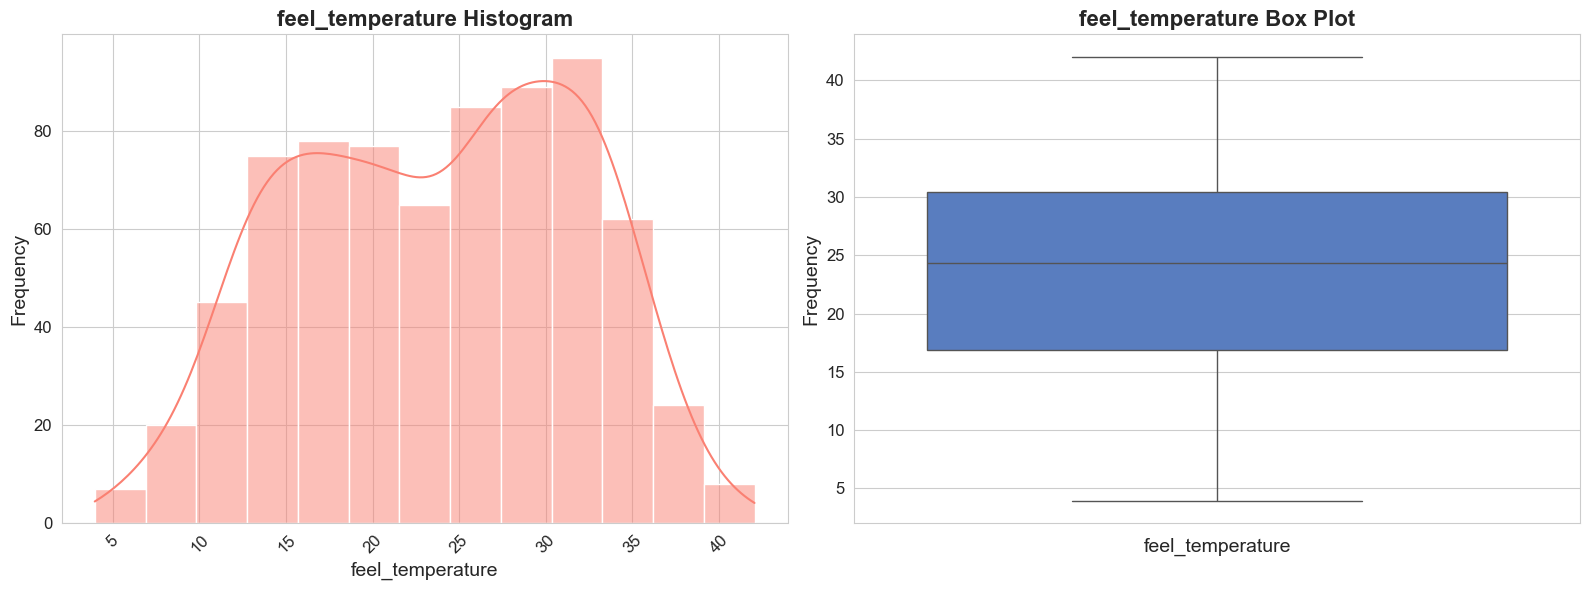

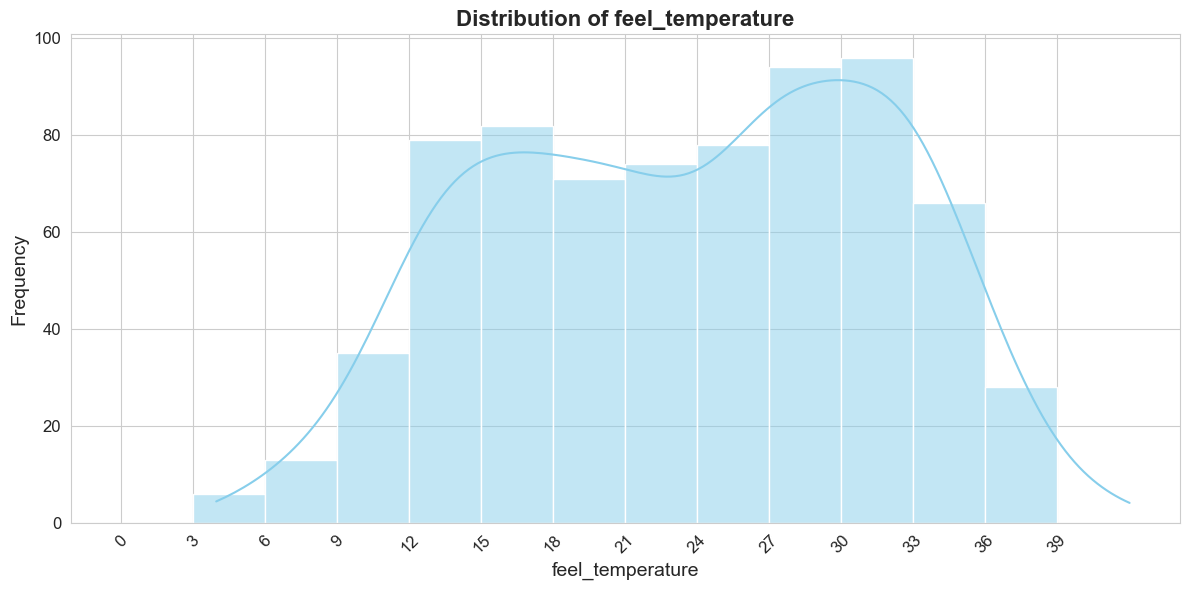

In [31]:
univariate_analysis = UnivariateAnalysis(df_clean, 'feel_temperature')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(0, 40, 3))

### Observations

**Feel temperatureerature (feel_temperatureerature)**: The histogram reveals a peak between 20 and 30 degrees, indicating most frequent ridership in that range. Colder and warmer temperatureeratures see less ridership.

Initiating detailed analysis of humidity...

Statistical summary for humidity:
count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: humidity, dtype: float64

The mode of humidity is: 61.3333



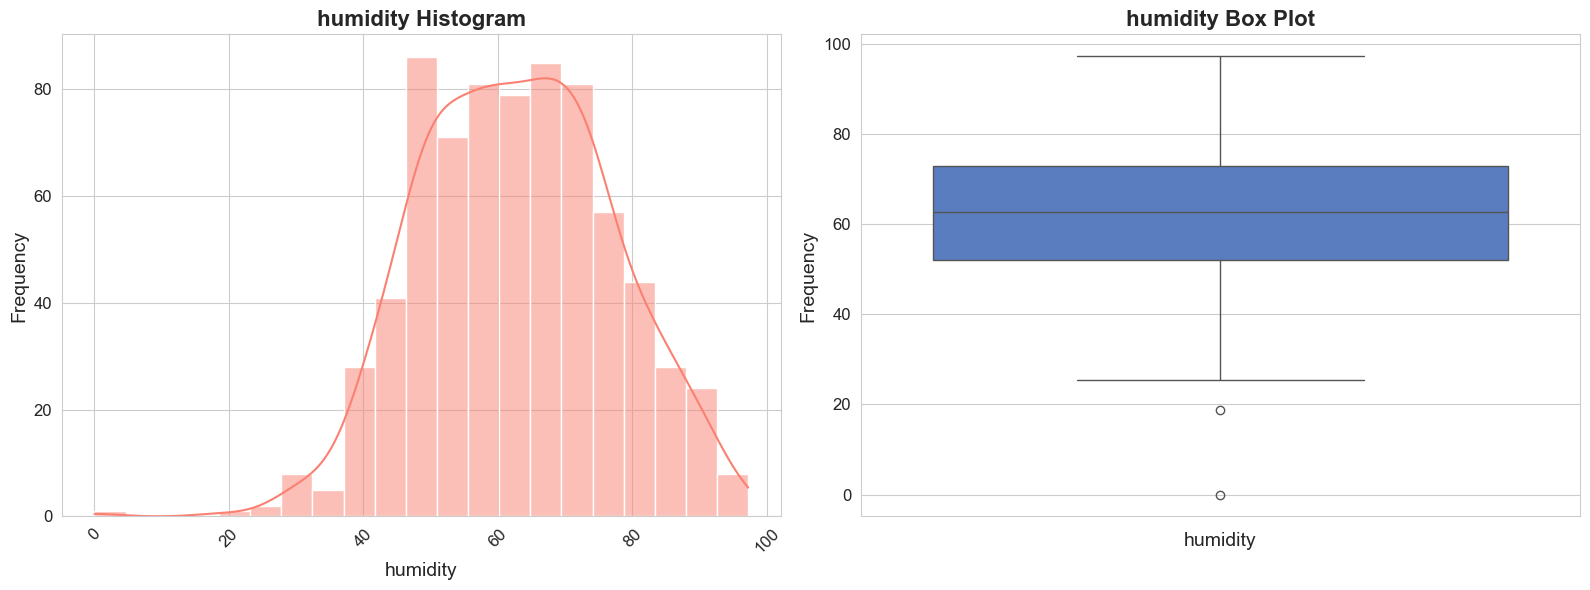

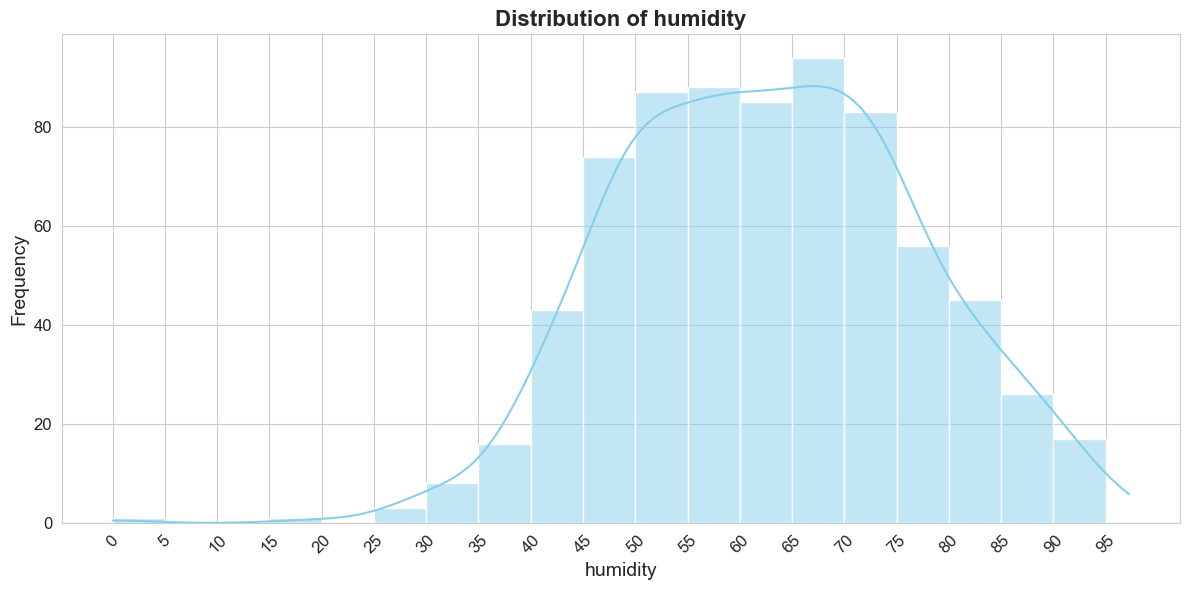

In [32]:
univariate_analysis = UnivariateAnalysis(df_clean, 'humidity')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(0, 100, 5))

### Observations

**Humidity**: The humidity histogram peaks near 60%, but lacks clarity on its impact on bike sharing.

Initiating detailed analysis of windspeed...

Statistical summary for windspeed:
count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

The mode of windspeed is: 7.12545



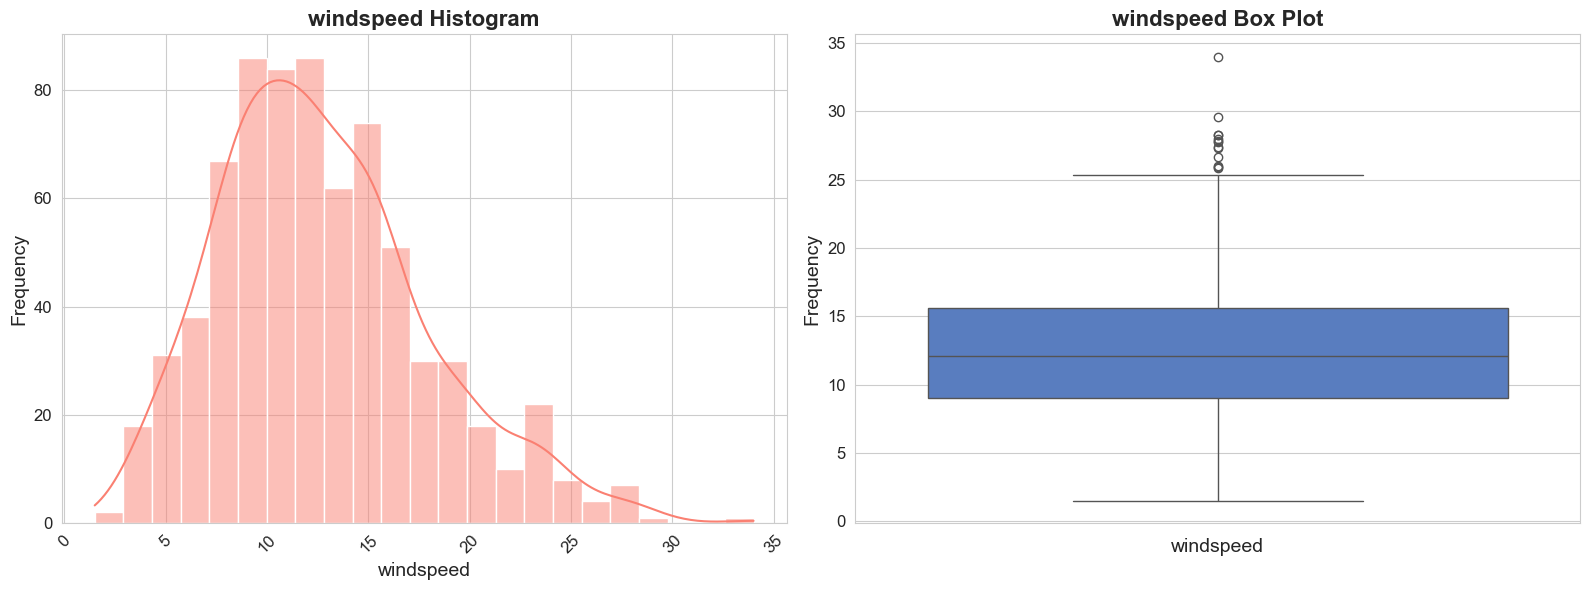

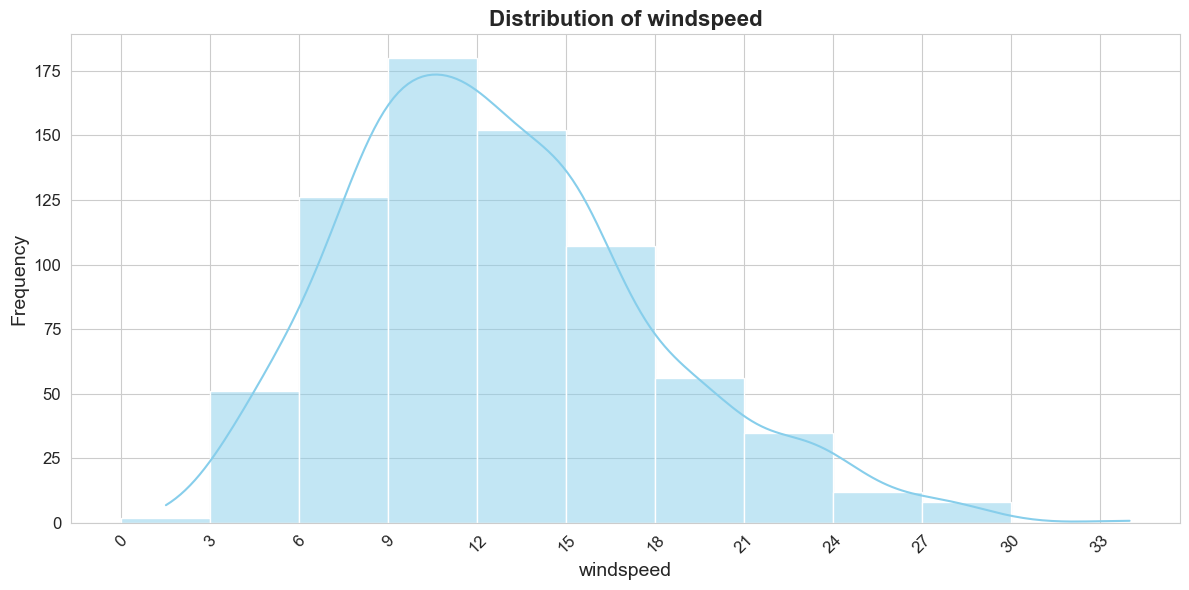

In [33]:
univariate_analysis = UnivariateAnalysis(df_clean, 'windspeed')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(0, 35, 3))

### Observations

**Windspeed**: The windspeed data shows a right-skewed distribution, peaking between 9-12 units. This suggests optimal ridesharing activity occurred within this windspeed range.

Initiating detailed analysis of total_count...

Statistical summary for total_count:
count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: total_count, dtype: float64

The mode of total_count is: 1096



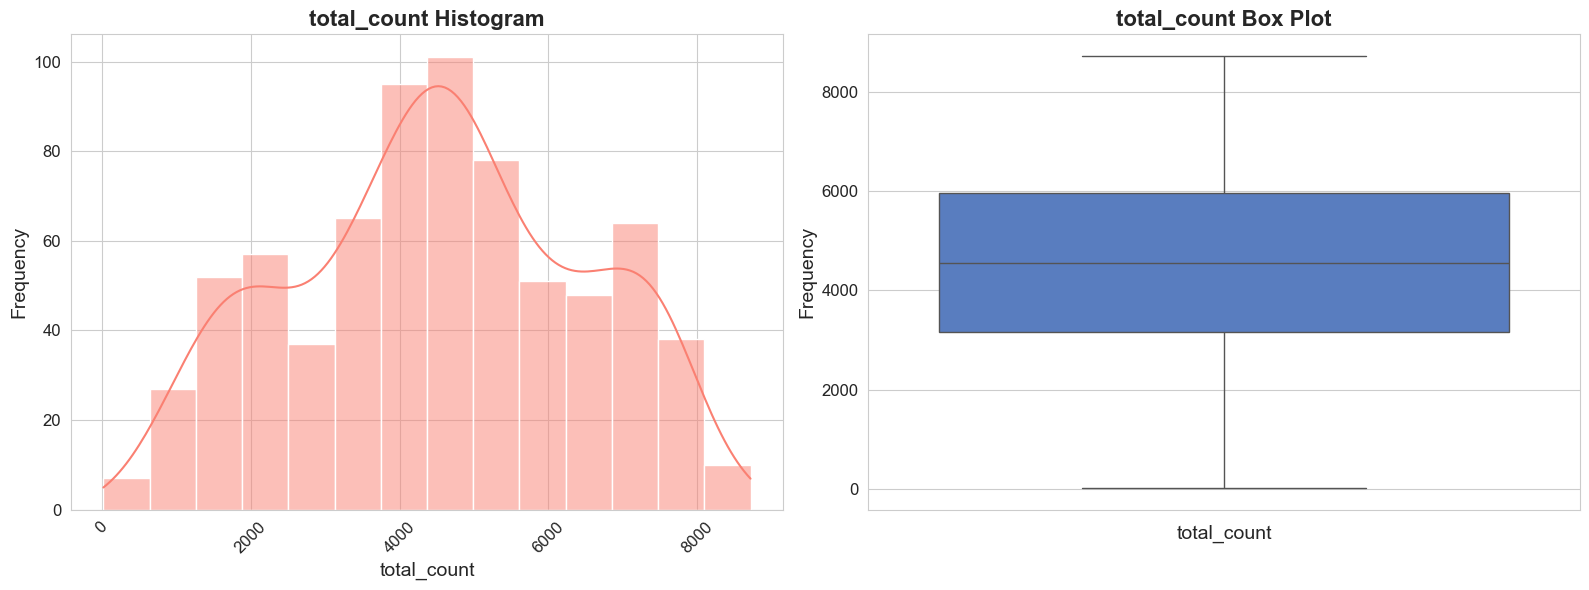

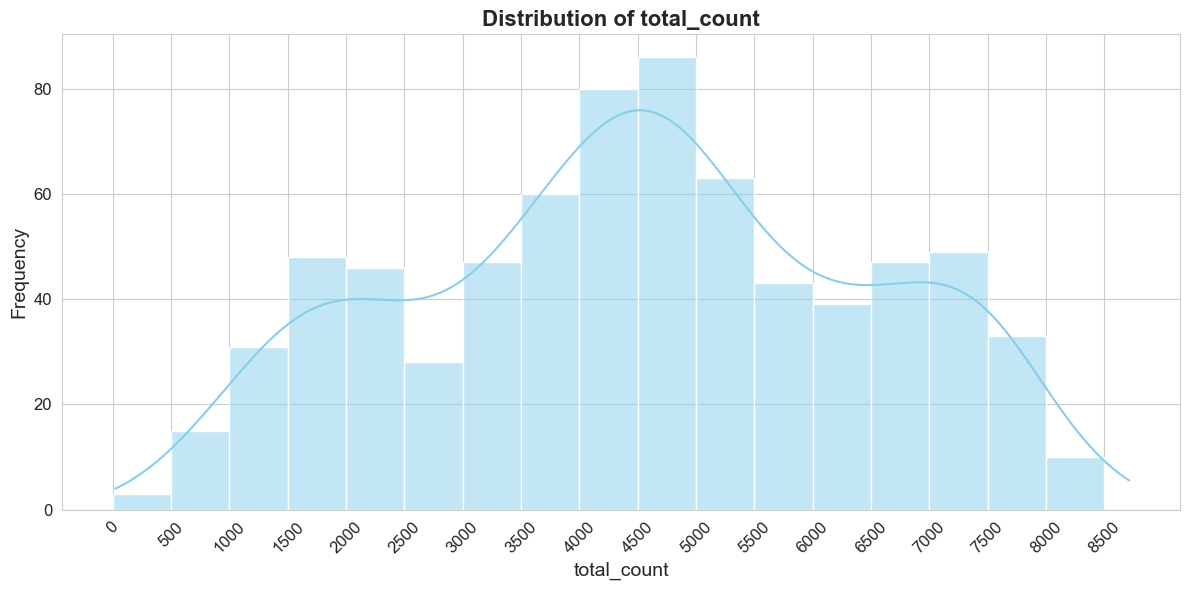

In [34]:
univariate_analysis = UnivariateAnalysis(df_clean, 'total_count')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(0, 9000, 500))

### Observations

**total_count**: Most of the daily bike sharing total_counts range from 22 to 8714, with a peak between 4500 and 5000, suggesting a mean around 4500. The mode is at 1096, and the distribution is normal.

Initiating detailed analysis of season...

Statistical summary for season:
count      730
unique       4
top       Fall
freq       188
Name: season, dtype: object

The mode of season is: Fall

total_count summary for season:
season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64


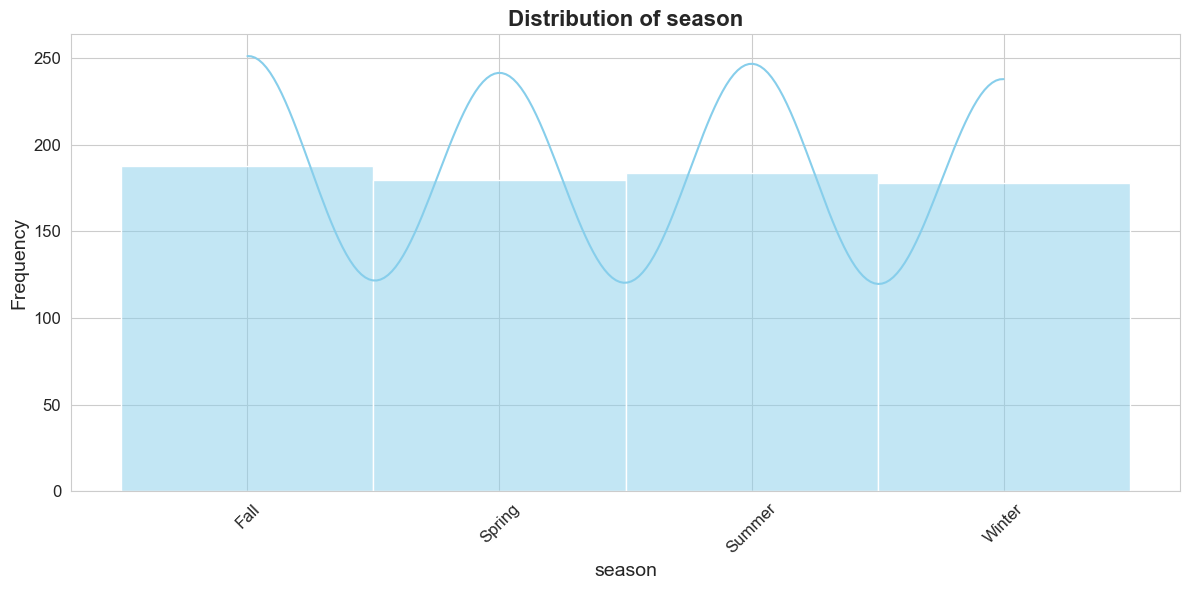

Initiating detailed analysis of year...

Statistical summary for year:
count      730
unique       2
top       2018
freq       365
Name: year, dtype: object

The mode of year is: 2018

total_count summary for year:
year
2018    365
2019    365
Name: count, dtype: int64


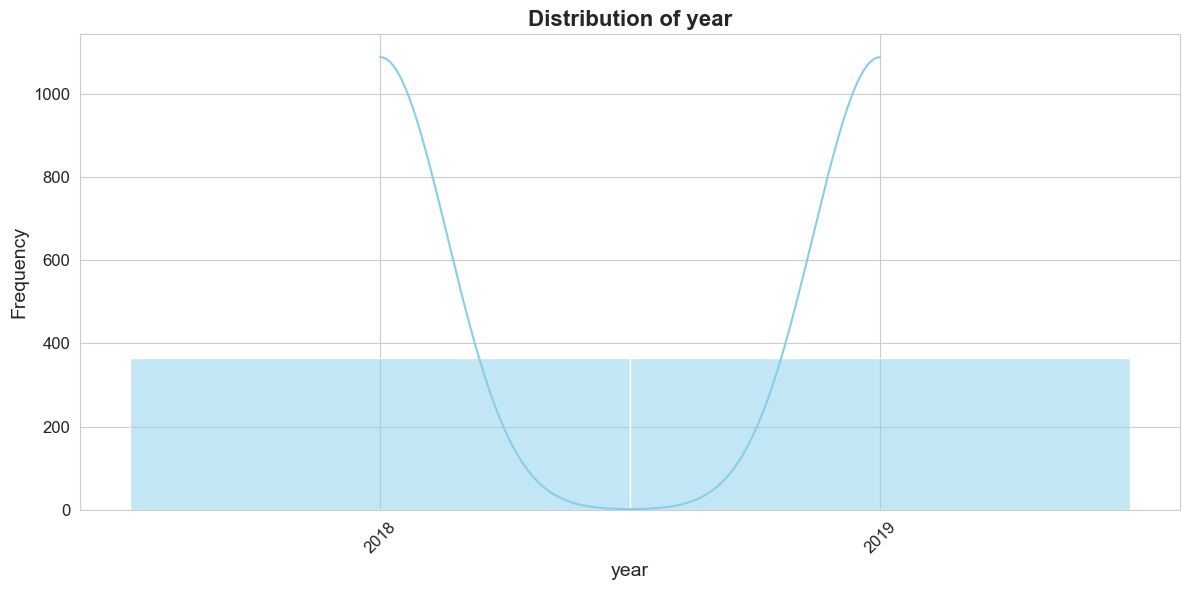

Initiating detailed analysis of month...

Statistical summary for month:
count        730
unique        12
top       August
freq          62
Name: month, dtype: object

The mode of month is: August

total_count summary for month:
month
August       62
December     62
January      62
July         62
March        62
May          62
October      62
April        60
June         60
November     60
September    60
February     56
Name: count, dtype: int64


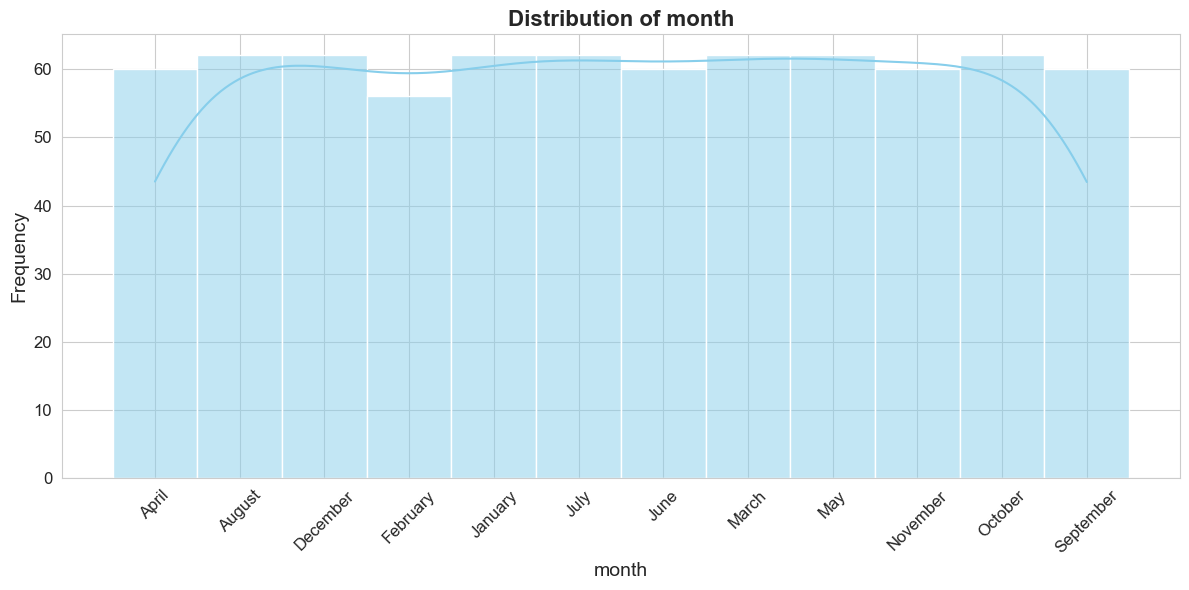

Initiating detailed analysis of is_holiday...

Statistical summary for is_holiday:
count       730
unique        2
top       False
freq        709
Name: is_holiday, dtype: object

The mode of is_holiday is: False

total_count summary for is_holiday:
is_holiday
False    709
True      21
Name: count, dtype: int64


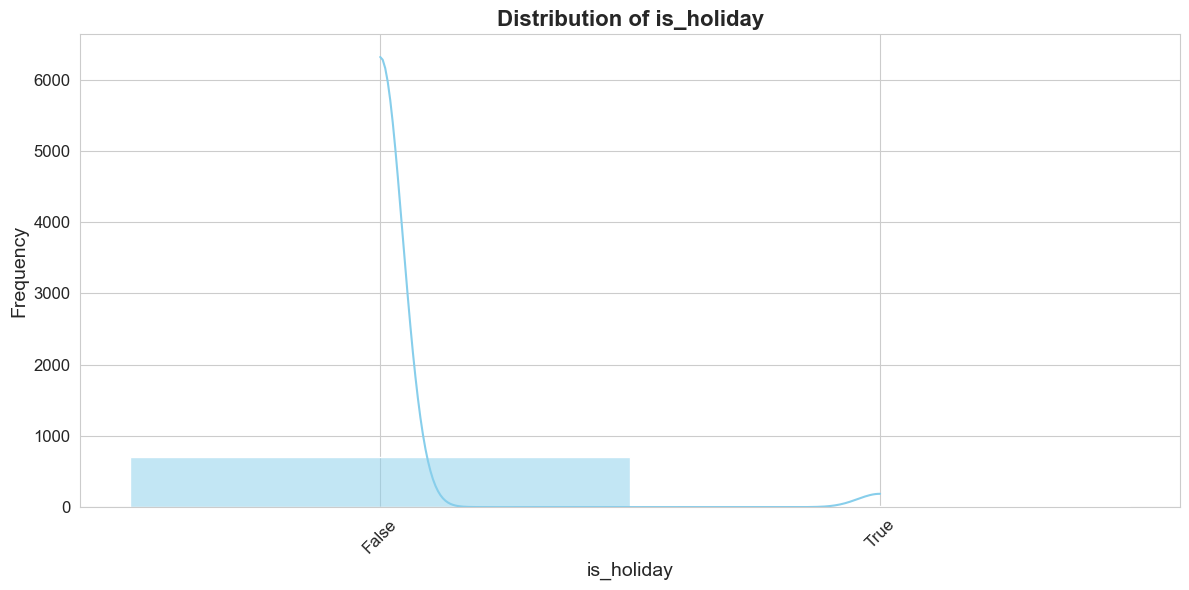

Initiating detailed analysis of weekday...

Statistical summary for weekday:
count        730
unique         7
top       Monday
freq         105
Name: weekday, dtype: object

The mode of weekday is: Monday

total_count summary for weekday:
weekday
Monday       105
Saturday     105
Sunday       105
Friday       104
Thursday     104
Tuesday      104
Wednesday    103
Name: count, dtype: int64


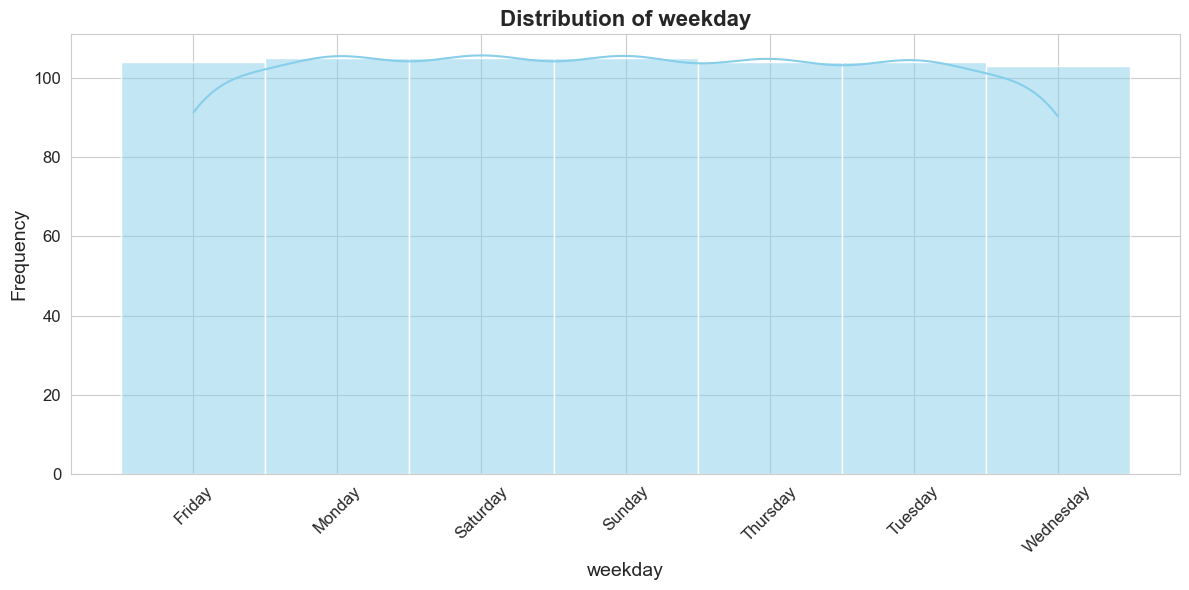

Initiating detailed analysis of is_workingday...

Statistical summary for is_workingday:
count      730
unique       2
top       True
freq       499
Name: is_workingday, dtype: object

The mode of is_workingday is: True

total_count summary for is_workingday:
is_workingday
True     499
False    231
Name: count, dtype: int64


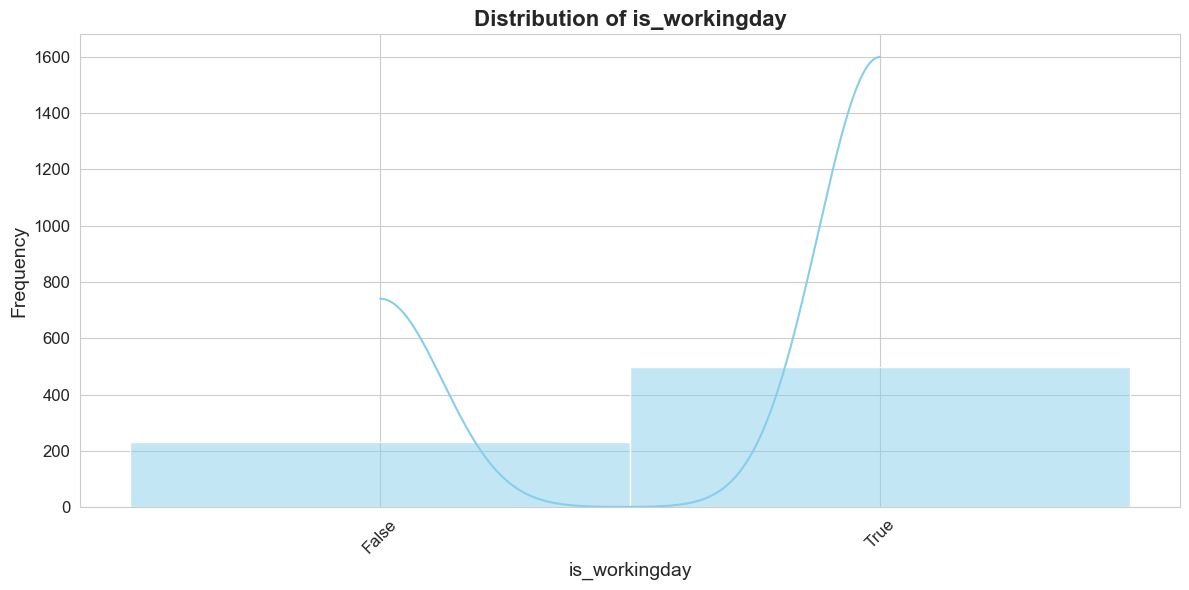

Initiating detailed analysis of weather_condition...

Statistical summary for weather_condition:
count       730
unique        3
top       Clear
freq        463
Name: weather_condition, dtype: object

The mode of weather_condition is: Clear

total_count summary for weather_condition:
weather_condition
Clear                463
Mist & Cloudy        246
Light Snow & Rain     21
Name: count, dtype: int64


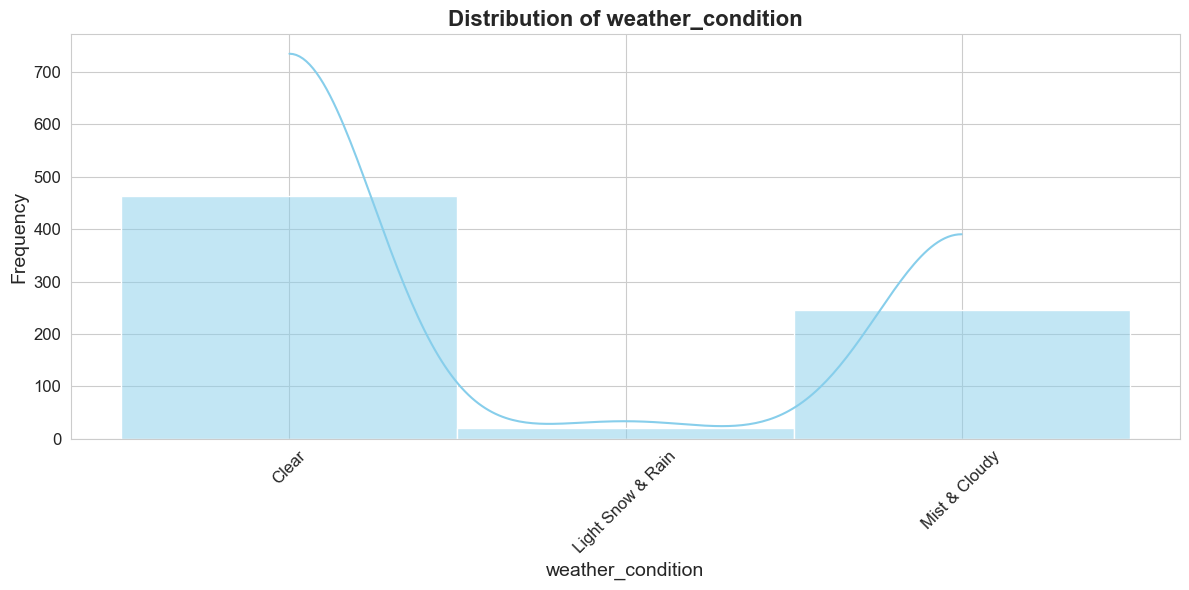

In [35]:
for category in categorical_columns:
        category_range = df_clean[category].unique().tolist()
        univariate_analysis = UnivariateAnalysis(df_clean, category)
        univariate_analysis.analyze_with_bins(bin_range=category_range, discrete=True, value_total_counts=True)

### Observations

1. **Seasons:** Among Fall (188), Summer (184), Spring (180), and Winter (178), Fall leads with 188 entries, making it the most frequent season.

2. **Years:** Both 2018 and 2019 are represented equally with 365 entries each, but 2018 appears more frequently in the dataset.

3. **Months:** January, March, May, July, August, October, and December are the most common months, with January having the highest frequency at 62 occurrences.

4. **is_holiday:** Non-is_holiday days are significantly more frequent with 709 entries, contrasting with only 21 entries for is_holidays.

5. **Weekday:** Saturdays are the most frequent day for bike sharing, appearing 105 times in the dataset.

6. **is_workingday:** Bike sharing data is more frequently collected on working days (499 entries) compared to non-working days (231 entries).

7. **weather_condition:** Clear weather conditions (463 entries) are the most common, followed by Mist & Cloudy (246 entries) and Light Snow & Rain (21 entries).

## Segmented Univariate Exploration

In [36]:
# is_workingday Segment
df_is_workingday = df_clean[df_clean['is_workingday'] == 'True']
df_not_workingday = df_clean[df_clean['is_workingday'] == 'False']

Initiating detailed analysis of season...

Statistical summary for season:
count      499
unique       4
top       Fall
freq       131
Name: season, dtype: object

The mode of season is: Fall

total_count summary for season:
season
Fall      131
Summer    128
Winter    121
Spring    119
Name: count, dtype: int64


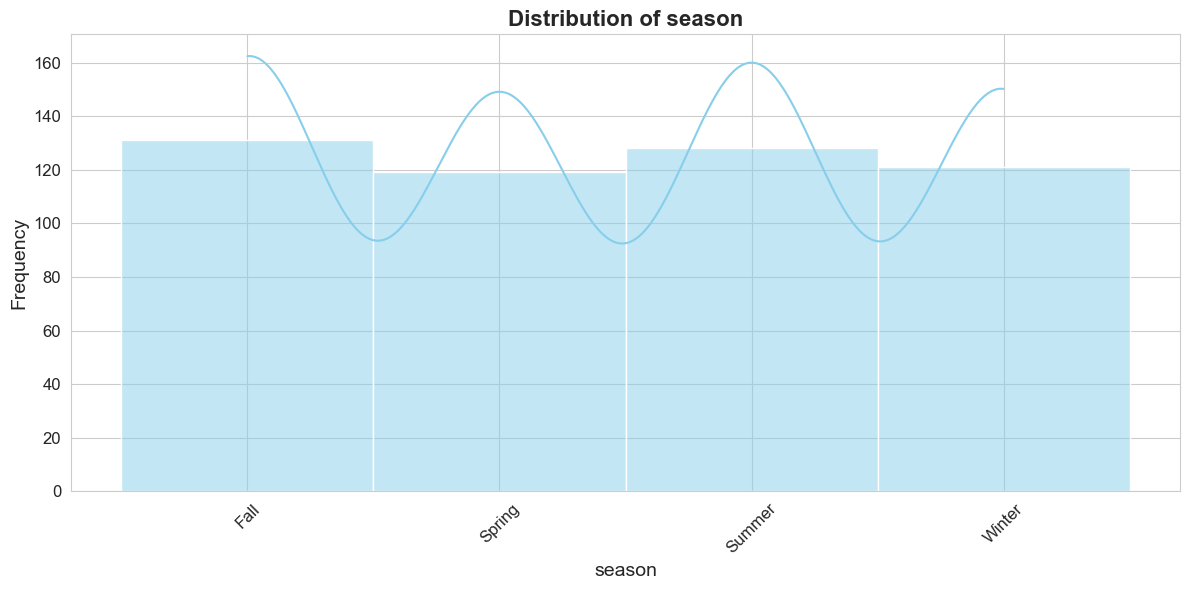

Initiating detailed analysis of year...

Statistical summary for year:
count      499
unique       2
top       2018
freq       250
Name: year, dtype: object

The mode of year is: 2018

total_count summary for year:
year
2018    250
2019    249
Name: count, dtype: int64


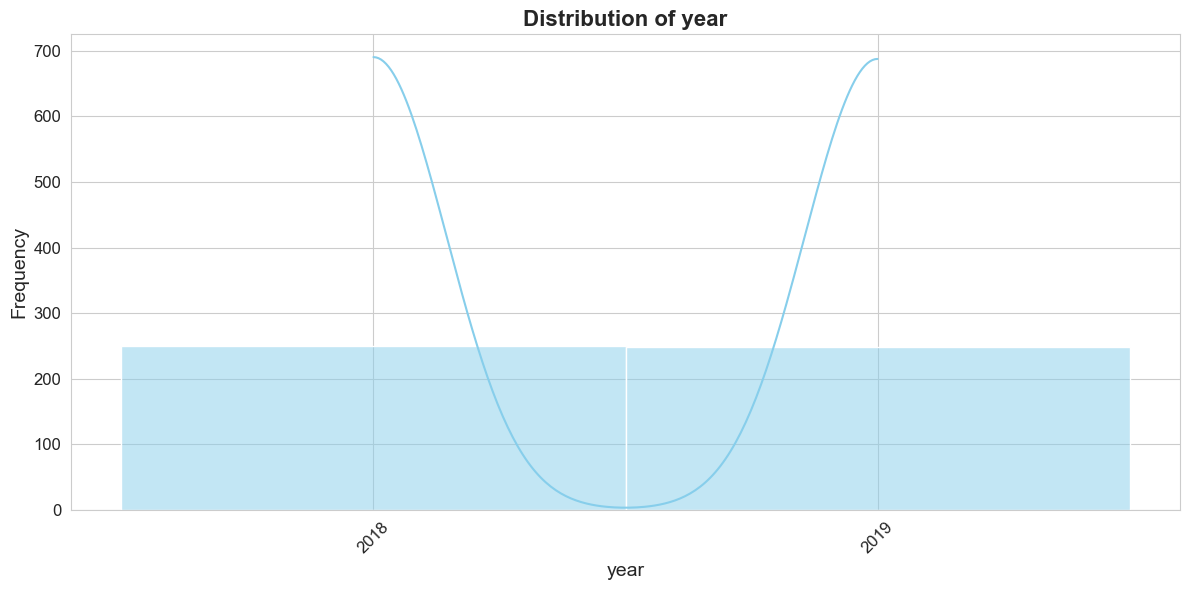

Initiating detailed analysis of month...

Statistical summary for month:
count        499
unique        12
top       August
freq          46
Name: month, dtype: object

The mode of month is: August

total_count summary for month:
month
August       46
March        45
June         43
May          43
October      42
December     41
July         41
April        40
January      40
November     40
September    40
February     38
Name: count, dtype: int64


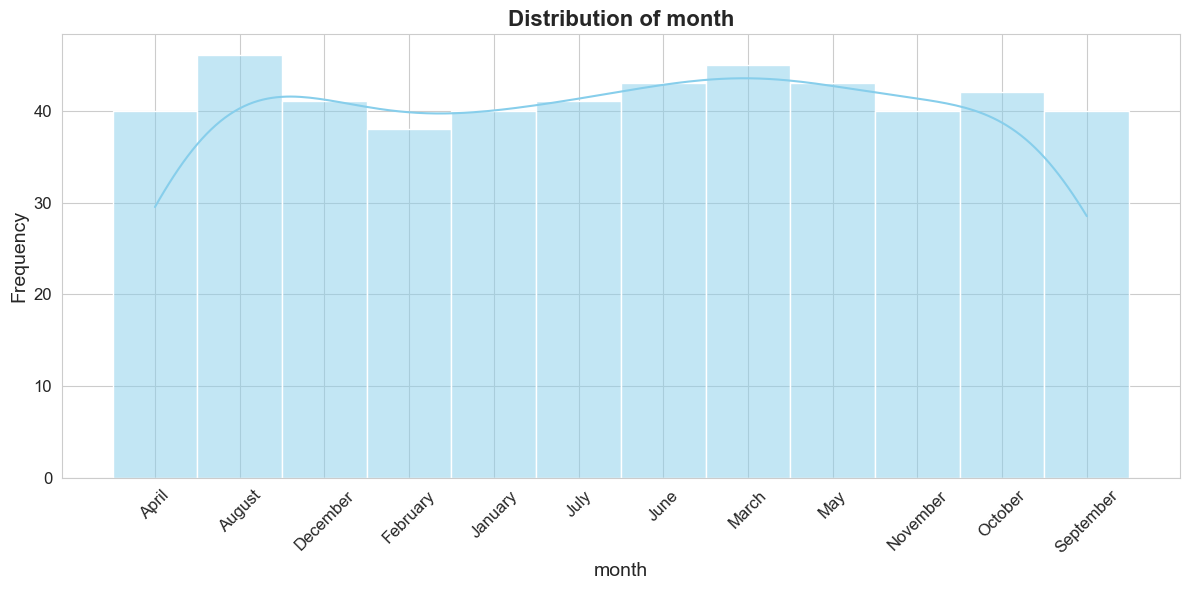

Initiating detailed analysis of is_holiday...

Statistical summary for is_holiday:
count       499
unique        1
top       False
freq        499
Name: is_holiday, dtype: object

The mode of is_holiday is: False

total_count summary for is_holiday:
is_holiday
False    499
True       0
Name: count, dtype: int64


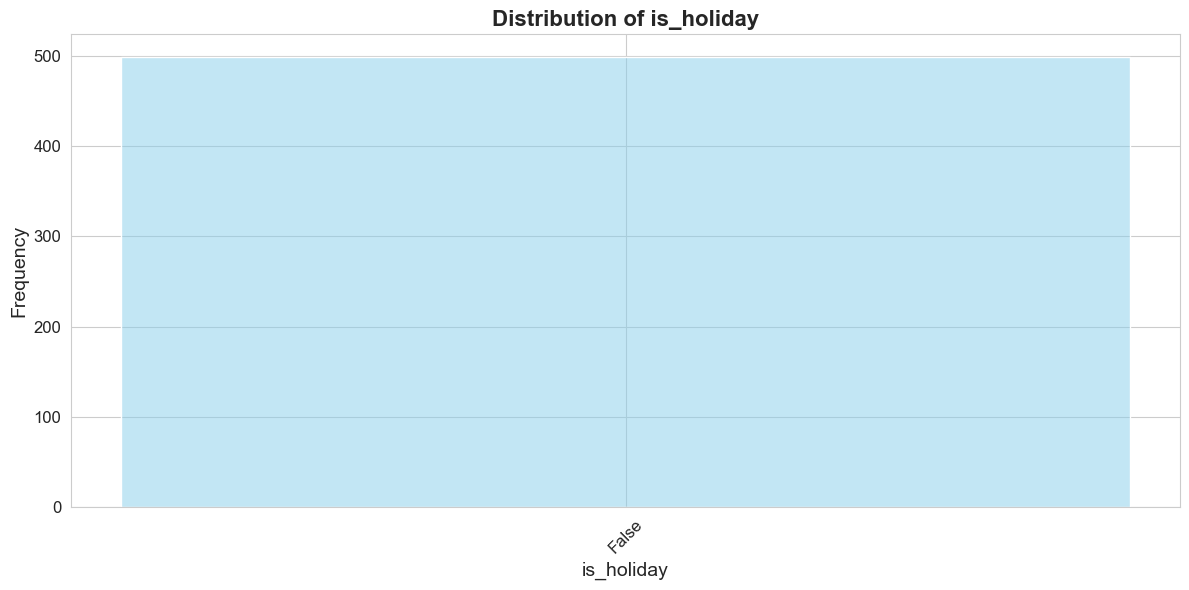

Initiating detailed analysis of weekday...

Statistical summary for weekday:
count         499
unique          5
top       Tuesday
freq          103
Name: weekday, dtype: object

The mode of weekday is: Tuesday

total_count summary for weekday:
weekday
Tuesday      103
Friday       102
Thursday     102
Wednesday    102
Monday        90
Saturday       0
Sunday         0
Name: count, dtype: int64


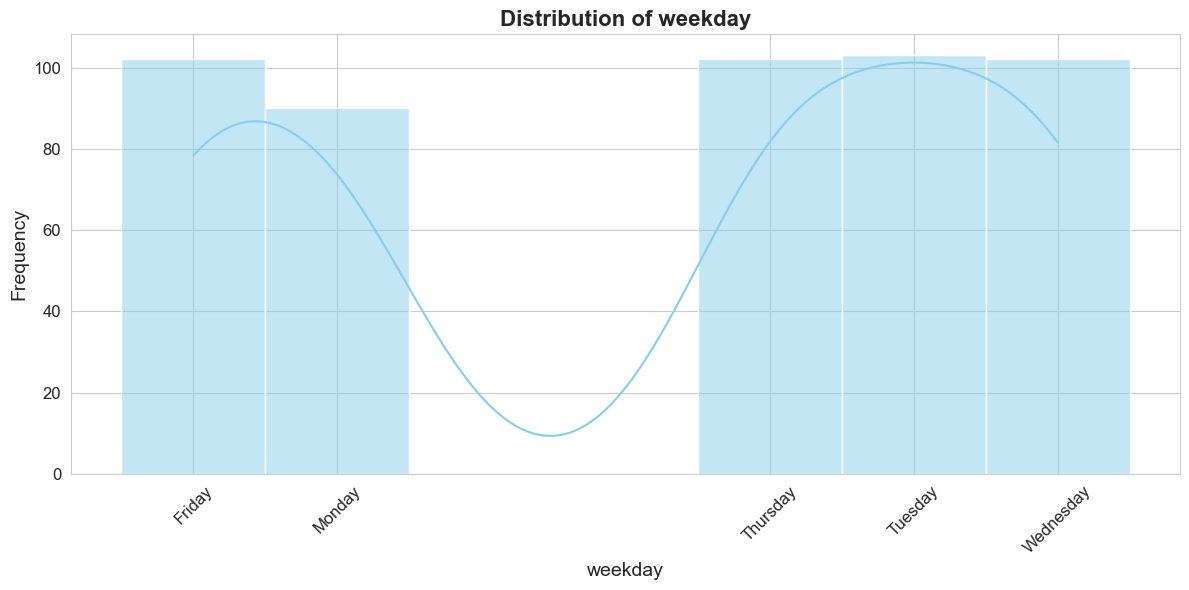

Initiating detailed analysis of weather_condition...

Statistical summary for weather_condition:
count       499
unique        3
top       Clear
freq        307
Name: weather_condition, dtype: object

The mode of weather_condition is: Clear

total_count summary for weather_condition:
weather_condition
Clear                307
Mist & Cloudy        176
Light Snow & Rain     16
Name: count, dtype: int64


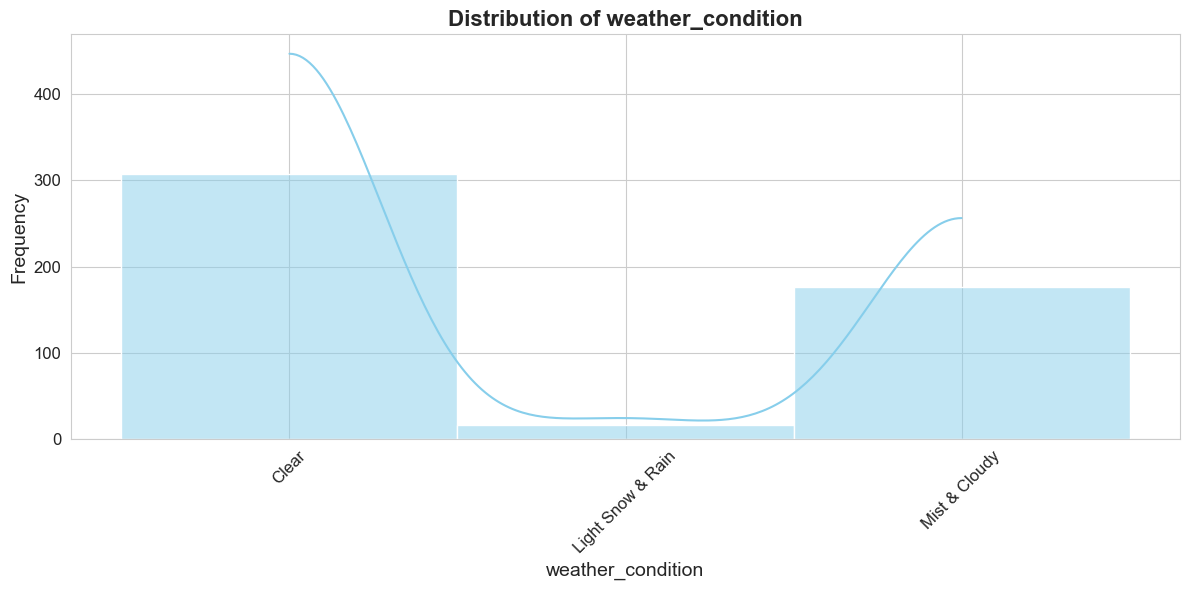

In [37]:
for category in categorical_columns:
    if 'is_workingday' != category:
        category_range = df_is_workingday[category].unique().tolist()
        univariate_analysis = UnivariateAnalysis(df_is_workingday, category)
        univariate_analysis.analyze_with_bins(bin_range=category_range, discrete=True, value_total_counts=True)

### Observations

1. **Season:**
   - Fall (131), Summer (128), Winter (121), Spring (119).
   - Fall is the most frequent season, indicating higher bike usage during these seasons.

2. **Year:**
   - 2018 (250), 2019 (249).
   - 2018 appears more frequently, suggesting a focus on bike sharing data from that year.

3. **is_holiday:**
   - False (499), True (0).
   - Data predominantly reflects non-is_holiday days, emphasizing regular working day contexts.

4. **Weekday:**
   - Tuesday (103), Wednesday (102), Thursday (102), Friday (102), Monday (90).
   - Weekdays are well-represented with Tuesday as the most frequent, typical for commuting patterns.

5. **Month:**
   - August (46), March (45), May (43), June (43), October (42).
   - August stands out, suggesting peak bike usage in late summer months.

6. **weather_condition:**
   - Clear (307), Mist & Cloudy (176), Light Snow & Rain (16).
   - Good weather conditions dominate, influencing higher bike sharing activities.

Initiating detailed analysis of season...

Statistical summary for season:
count        231
unique         4
top       Spring
freq          61
Name: season, dtype: object

The mode of season is: Spring

total_count summary for season:
season
Spring    61
Fall      57
Winter    57
Summer    56
Name: count, dtype: int64


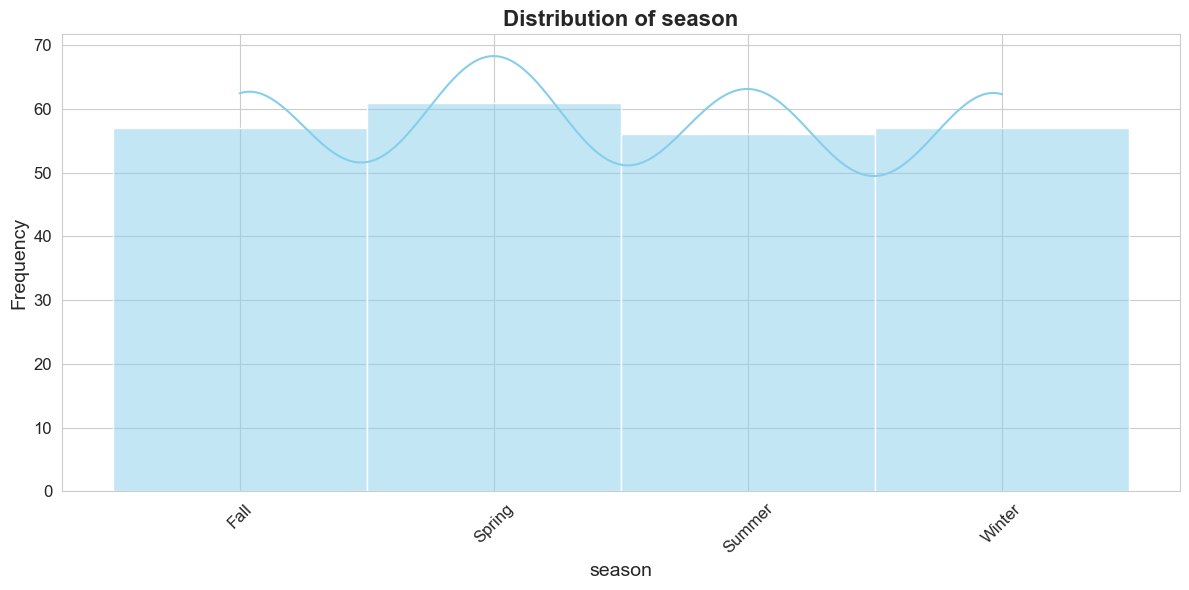

Initiating detailed analysis of year...

Statistical summary for year:
count      231
unique       2
top       2019
freq       116
Name: year, dtype: object

The mode of year is: 2019

total_count summary for year:
year
2019    116
2018    115
Name: count, dtype: int64


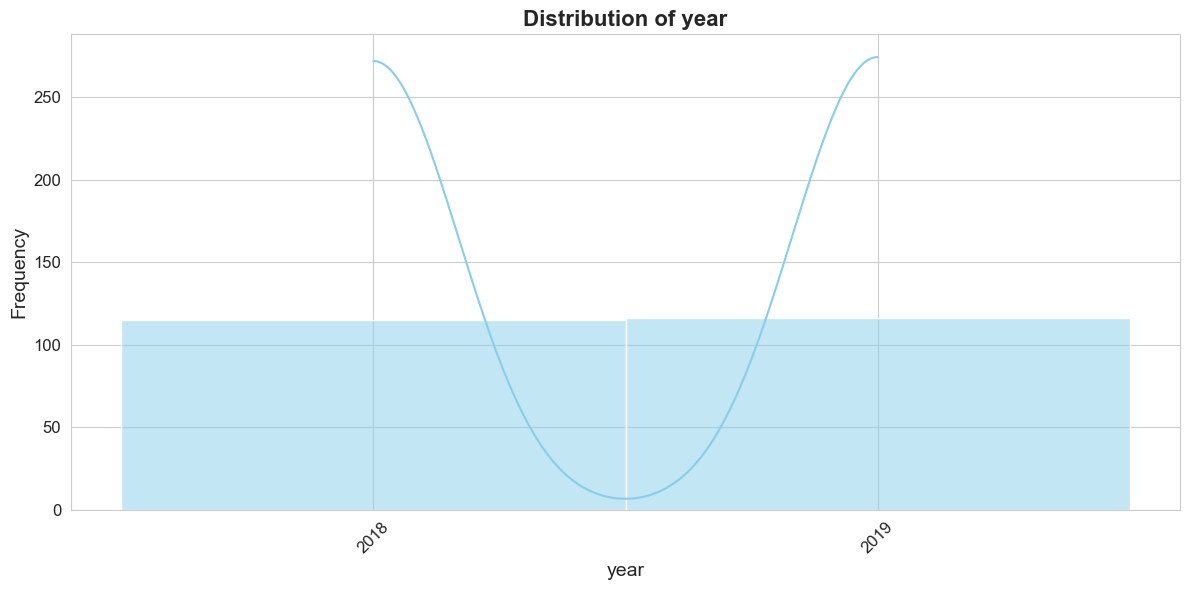

Initiating detailed analysis of month...

Statistical summary for month:
count         231
unique         12
top       January
freq           22
Name: month, dtype: object

The mode of month is: January

total_count summary for month:
month
January      22
December     21
July         21
April        20
November     20
October      20
September    20
May          19
February     18
June         17
March        17
August       16
Name: count, dtype: int64


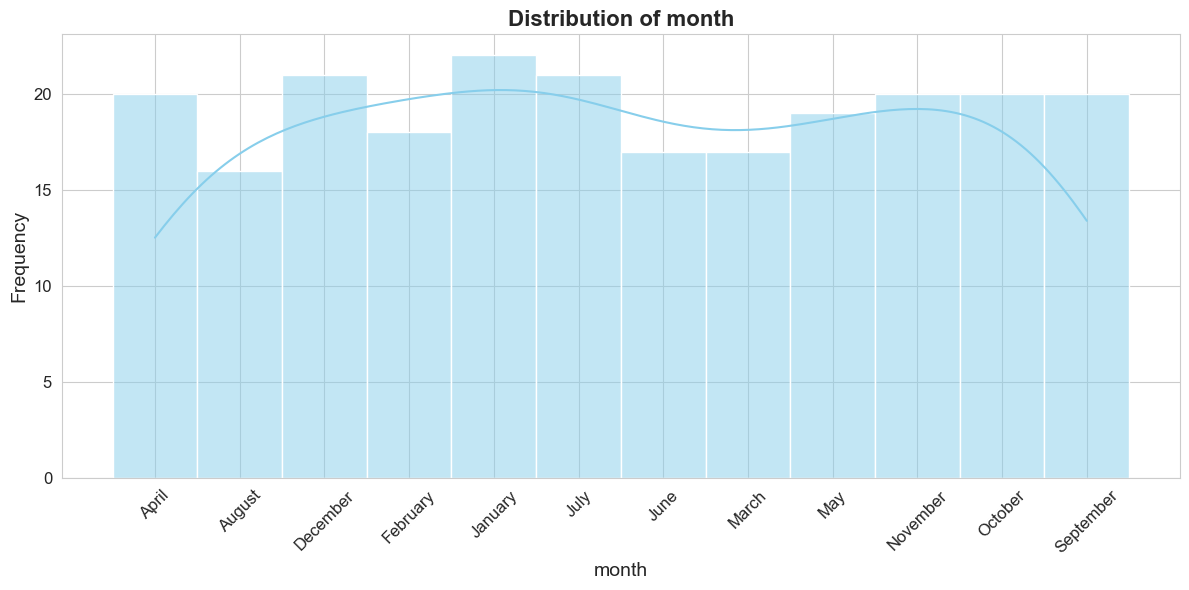

Initiating detailed analysis of is_holiday...

Statistical summary for is_holiday:
count       231
unique        2
top       False
freq        210
Name: is_holiday, dtype: object

The mode of is_holiday is: False

total_count summary for is_holiday:
is_holiday
False    210
True      21
Name: count, dtype: int64


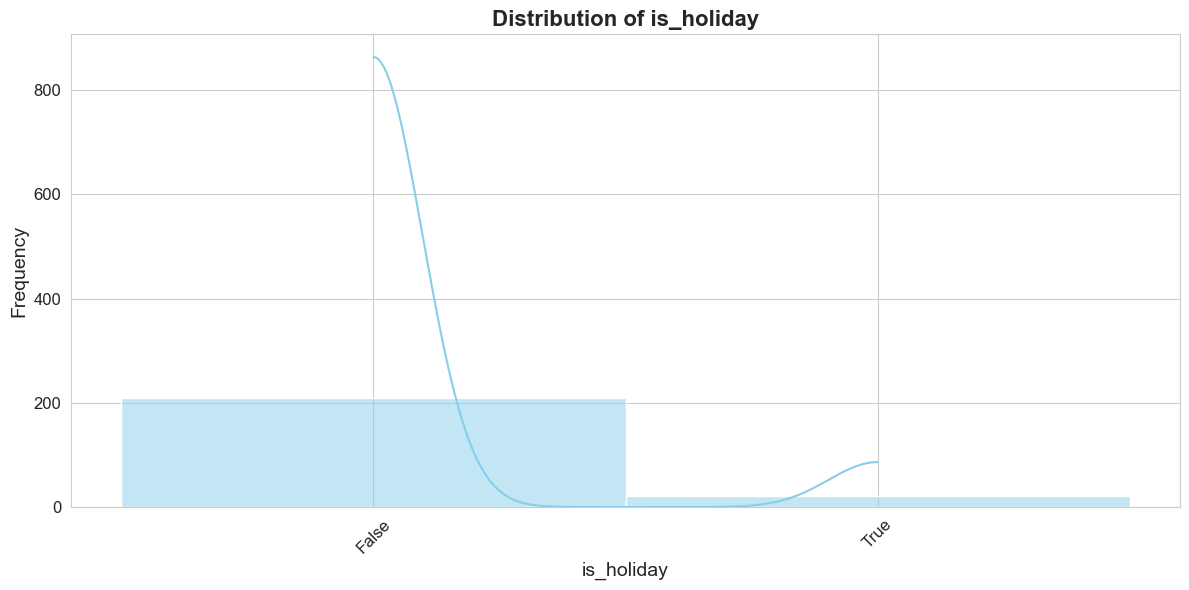

Initiating detailed analysis of weekday...

Statistical summary for weekday:
count          231
unique           7
top       Saturday
freq           105
Name: weekday, dtype: object

The mode of weekday is: Saturday

total_count summary for weekday:
weekday
Saturday     105
Sunday       105
Monday        15
Friday         2
Thursday       2
Tuesday        1
Wednesday      1
Name: count, dtype: int64


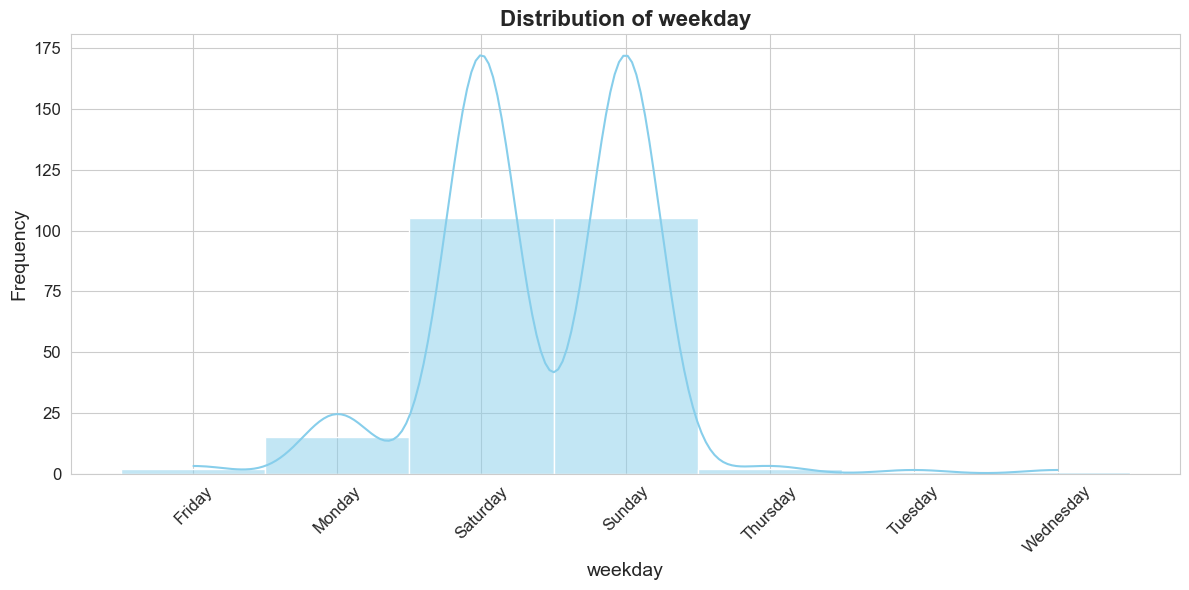

Initiating detailed analysis of weather_condition...

Statistical summary for weather_condition:
count       231
unique        3
top       Clear
freq        156
Name: weather_condition, dtype: object

The mode of weather_condition is: Clear

total_count summary for weather_condition:
weather_condition
Clear                156
Mist & Cloudy         70
Light Snow & Rain      5
Name: count, dtype: int64


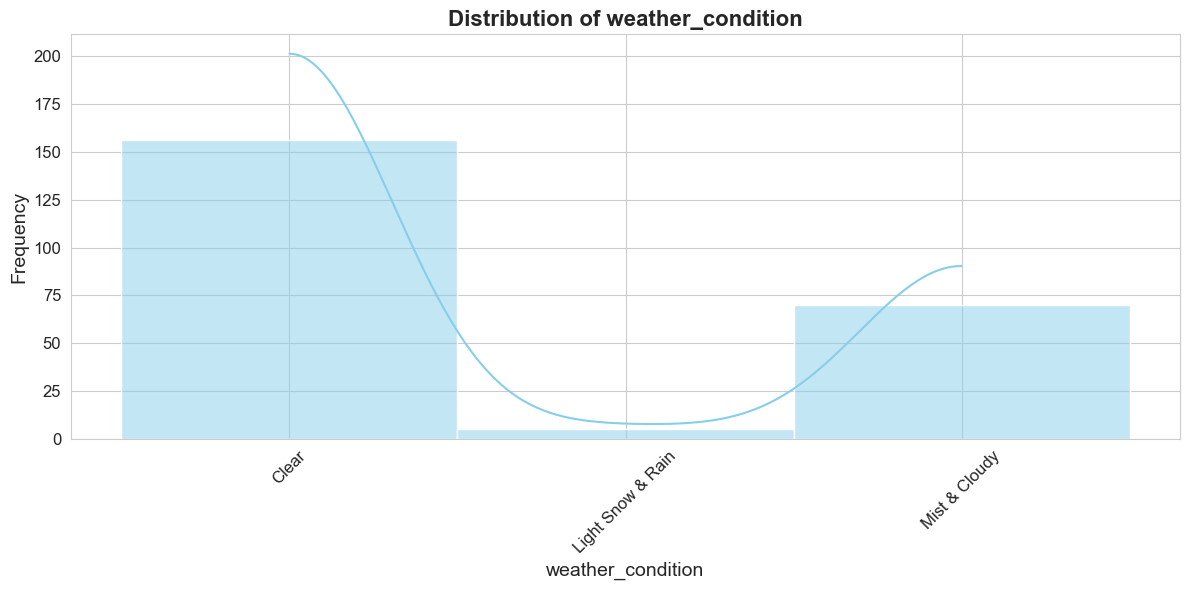

In [38]:
for category in categorical_columns:
    if 'is_workingday' != category:
        category_range = df_not_workingday[category].unique().tolist()
        univariate_analysis = UnivariateAnalysis(df_not_workingday, category)
        univariate_analysis.analyze_with_bins(bin_range=category_range, discrete=True, value_total_counts=True)

### Observations

1. **Season:**
   - Spring (61), Fall (57), Winter (57), Summer (56).
   - Spring is the most frequent season, indicating peak bike usage during spring on non-working days.

2. **Year:**
   - 2019 (116), 2018 (115).
   - 2019 slightly exceeds 2018, showing a balanced representation of non-working day data across both years.

3. **is_holiday:**
   - False (210), True (21).
   - Non-is_holiday days significantly dominate, typical for weekends and public is_holidays.

4. **Weekday:**
   - Saturday (105), Sunday (105), Monday (15).
   - Weekends (Saturday and Sunday) are most frequent, reflecting higher bike activity on non-working days.

5. **Month:**
   - January (22), July (21), December (21), others varying.
   - January stands out, possibly indicating seasonal trends or preferences for bike usage on non-working days.

6. **weather_condition:**
   - Clear (156), Mist & Cloudy (70), Light Snow & Rain (5).
   - Good weather conditions dominate, influencing increased bike sharing on non-working days under favorable weather.

## Bivariate Exploration

In [39]:
# A class for performing bivariate analysis on a DataFrame.

class BivariateAnalysis:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    # Generates a scatter plot for two specified columns in a DataFrame.
    def scatter_plot(self, x_column, y_column, ax, marker_size=10, alpha=0.2, color='orange'):

        sns.set(style="whitegrid")
        # Scatter plot with regression line
        sns.regplot(data=self.dataframe, x=x_column, y=y_column, scatter_kws={'s': marker_size, 'alpha': alpha, 'color': color}, 
                    line_kws={'color': 'red'}, ax=ax)

        # Set plot title and labels
        ax.set_title(f'Scatter Plot: {x_column} vs {y_column}', fontsize=13)
        ax.set_xlabel(x_column, fontsize=10)
        ax.set_ylabel(y_column, fontsize=10)
        plt.tight_layout()


    # Generates a boxplot for a categorical column against a numerical column for bivariate analysis.
    def boxplot(self, categorical_column, numerical_column, ax, palette='pastel'):
        
        sns.set(style="whitegrid")

        sns.boxplot(data=self.dataframe, x=categorical_column, y=numerical_column, palette=palette, ax=ax)

        # Set plot title and labels
        ax.set_title(f'Boxplot: {categorical_column} vs {numerical_column}', fontsize=13)
        ax.set_xlabel(categorical_column, fontsize=10)
        ax.set_ylabel(numerical_column, fontsize=10)

        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        plt.tight_layout()

### Bivariate Analysis - Numerical vs Numerical

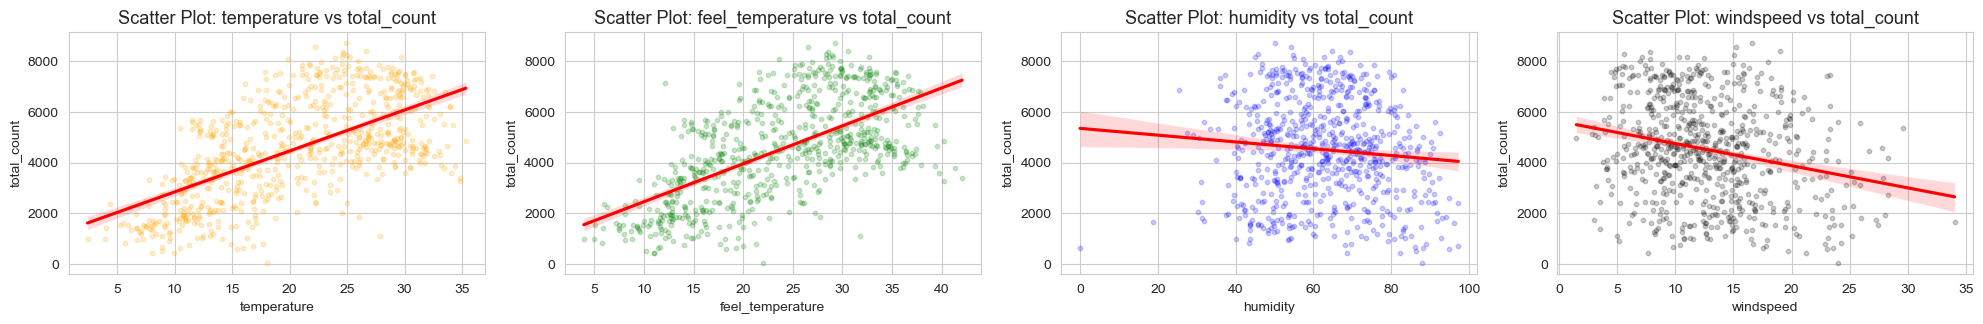

In [40]:
numerical = ['temperature', 'feel_temperature', 'humidity', 'windspeed']
target_column = 'total_count'
colors = ['orange','green','blue','black']

length = len(numerical)
fig, axes = plt.subplots(nrows=(length + 2) // 1, ncols=length, figsize=(20, 18))
axes = axes.flatten()

bivariate_analysis = BivariateAnalysis(df_clean)
for i in range(length):  
    bivariate_analysis.scatter_plot(numerical[i], target_column, ax=axes[i], color=colors[i])

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

### Graph Observations and Summary:

#### 1. temperature vs total_count
- **Observation:** The scatter plot shows a positive correlation between temperature and total_count.
- **Summary:** Higher temperatureeratures are associated with higher total_counts.

#### 2. feel_temperature vs total_count
- **Observation:** The scatter plot shows a  positive correlation between feel_temperature and total_count.
- **Summary:** Higher feel_temperatureerature values are associated with higher total_counts.

#### 3. Humidity vs total_count
- **Observation:** The scatter plot shows a weak negative correlation between humidity and total_count. 
- **Summary:** The weak negative correlation suggests minimal influence of humidity on total_count.

#### 4. Windspeed vs total_count
- **Observation:** The scatter plot shows a weak positive correlation between windspeed and total_count. 
- **Summary:** The weak positive correlation suggests minimal influence of windspeed on total_count. 


### Bivariate Analysis - Categorical vs Numerical

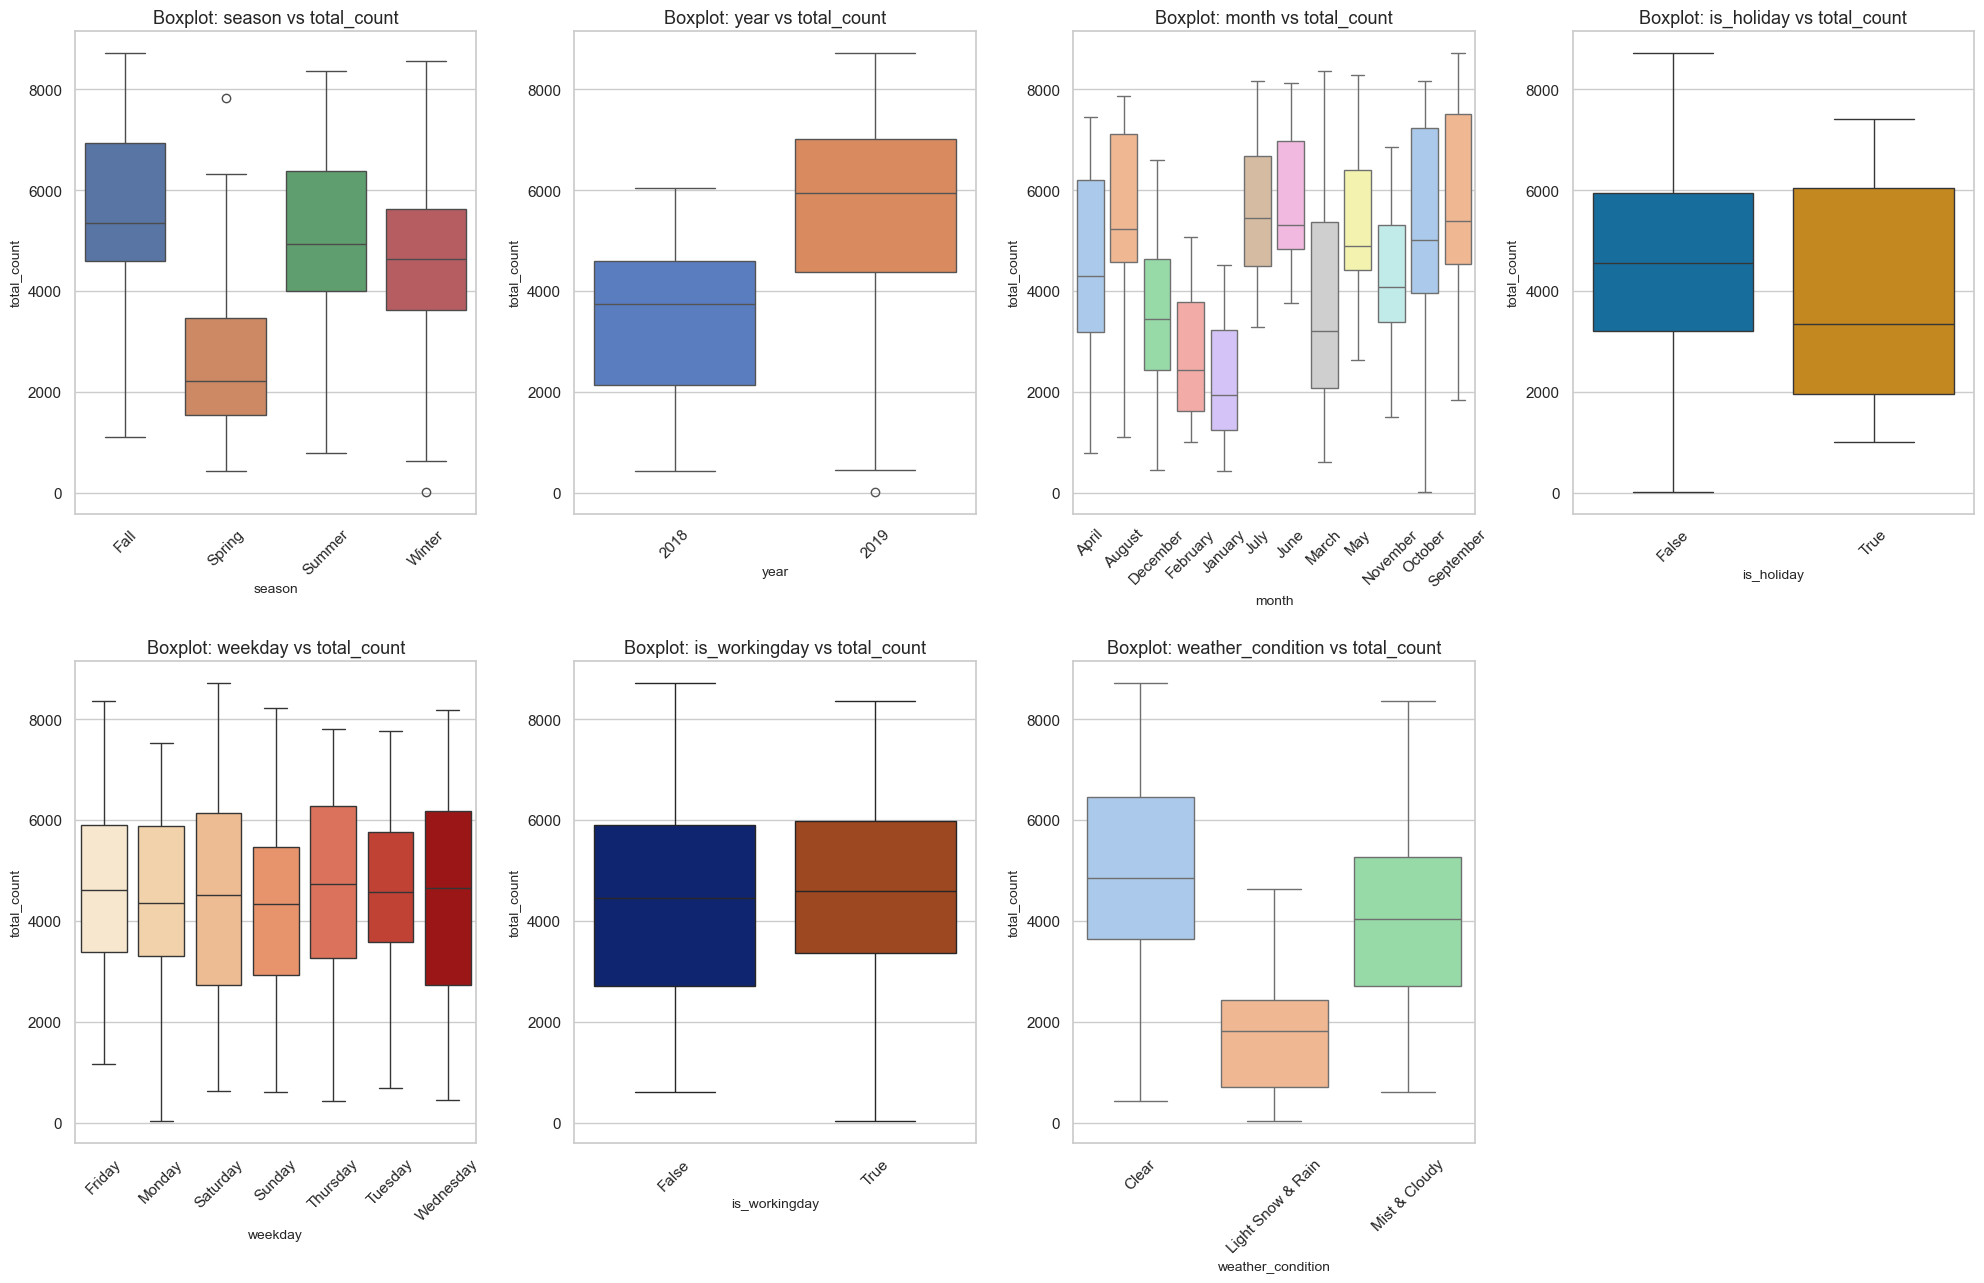

In [41]:
target_column = 'total_count'
palette = ['deep','muted','pastel','colorblind','OrRd','dark','pastel']

length = len(categorical_columns)

fig, axes = plt.subplots(nrows=(length + 2) // 3, ncols=4, figsize=(20, 18))
axes = axes.flatten()

bivariate_analysis = BivariateAnalysis(df_clean)
for i in range(length):   
    bivariate_analysis.boxplot(categorical_columns[i], target_column, ax=axes[i], palette=palette[i])

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

### Graph Observations and Summary:

#### 1. **Season vs total_count**
   - **Observation**: Rentals are highest in the fall and summer seasons. Winter has the lowest rentals, and spring shows moderate usage.
   - **Summary**: Fall and summer seasons see a peak in bike rentals, indicating favorable weather conditions. Winter sees the least bike usage.

#### 2. **Month vs total_count**
   - **Observation**: Rentals increase from January, peaking around May and October, and then decline towards the end of the year.
   - **Summary**: Bike rentals are higher during the warmer months (March to October), with May and October being peak months. Rentals are lowest in December and January.

#### 3. **Year vs total_count**
   - **Observation**: There is a significant increase in rentals from 2018 to 2019.
   - **Summary**: Bike rentals grew notably from 2018 to 2019, indicating increasing popularity or improved service.

#### 4. **is_holiday vs total_count**
   - **Observation**: Rentals on is_holidays are slightly higher than on non-is_holidays, but the difference is minimal.
   - **Summary**: Bike rentals remain fairly consistent regardless of is_holidays, with a slight increase on is_holidays.

#### 5. **Weekday vs total_count**
   - **Observation**: Rentals are relatively even across the weekdays, with no significant drop during weekends.
   - **Summary**: Bike rentals are steady throughout the week, suggesting consistent usage patterns on both weekdays and weekends.

#### 6. **is_workingday vs total_count**
   - **Observation**: Rentals on working days are slightly higher compared to non-working days.
   - **Summary**: There is a marginal increase in bike rentals on working days, possibly indicating commuting usage.

#### 7. **weather_condition vs total_count**
   - **Observation**: Clear weather conditions (good) have the highest rentals, while bad and severe weather conditions see a significant drop.
   - **Summary**: Favorable weather conditions (clear) lead to higher bike rentals. Poor weather conditions (bad and severe) result in lower usage.

### Bivariate Analysis - Categorical vs Categorical

In [42]:
# Distribution of loan amounts across different categories of loan_status and other categorical variables

def analyze_categorical_relationships(df, categorical_columns, target_column, value_column):
    results = {}
  
    for category in categorical_columns:
        if category != target_column:
            category_total_count = df[category].value_counts().sort_index()
            pivot_table = df.pivot_table(index=target_column, columns=category, values=value_column, aggfunc='count')
            pivot_table = round(pivot_table/pivot_table.sum() *100 , 2)
            results[category] = pivot_table
            results[category+"_count"] = category_total_count
    return results

def plot_categorical_relationships(pivot_table, category, target_column, value_column, ax):
    # Generate a custom color palette
    num_categories = pivot_table.shape[1]
    custom_palette = sns.color_palette("tab20", n_colors=num_categories)
    
    # Plotting
    pivot_table.plot(kind='bar', stacked=True, color=custom_palette, ax=ax)

    ax.set_xlabel(target_column, fontsize=10)
    ax.set_ylabel(value_column, fontsize=10)
    
    ax.set_title(f"Distribution of {value_column} across {target_column} and {category}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.legend(title=category, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

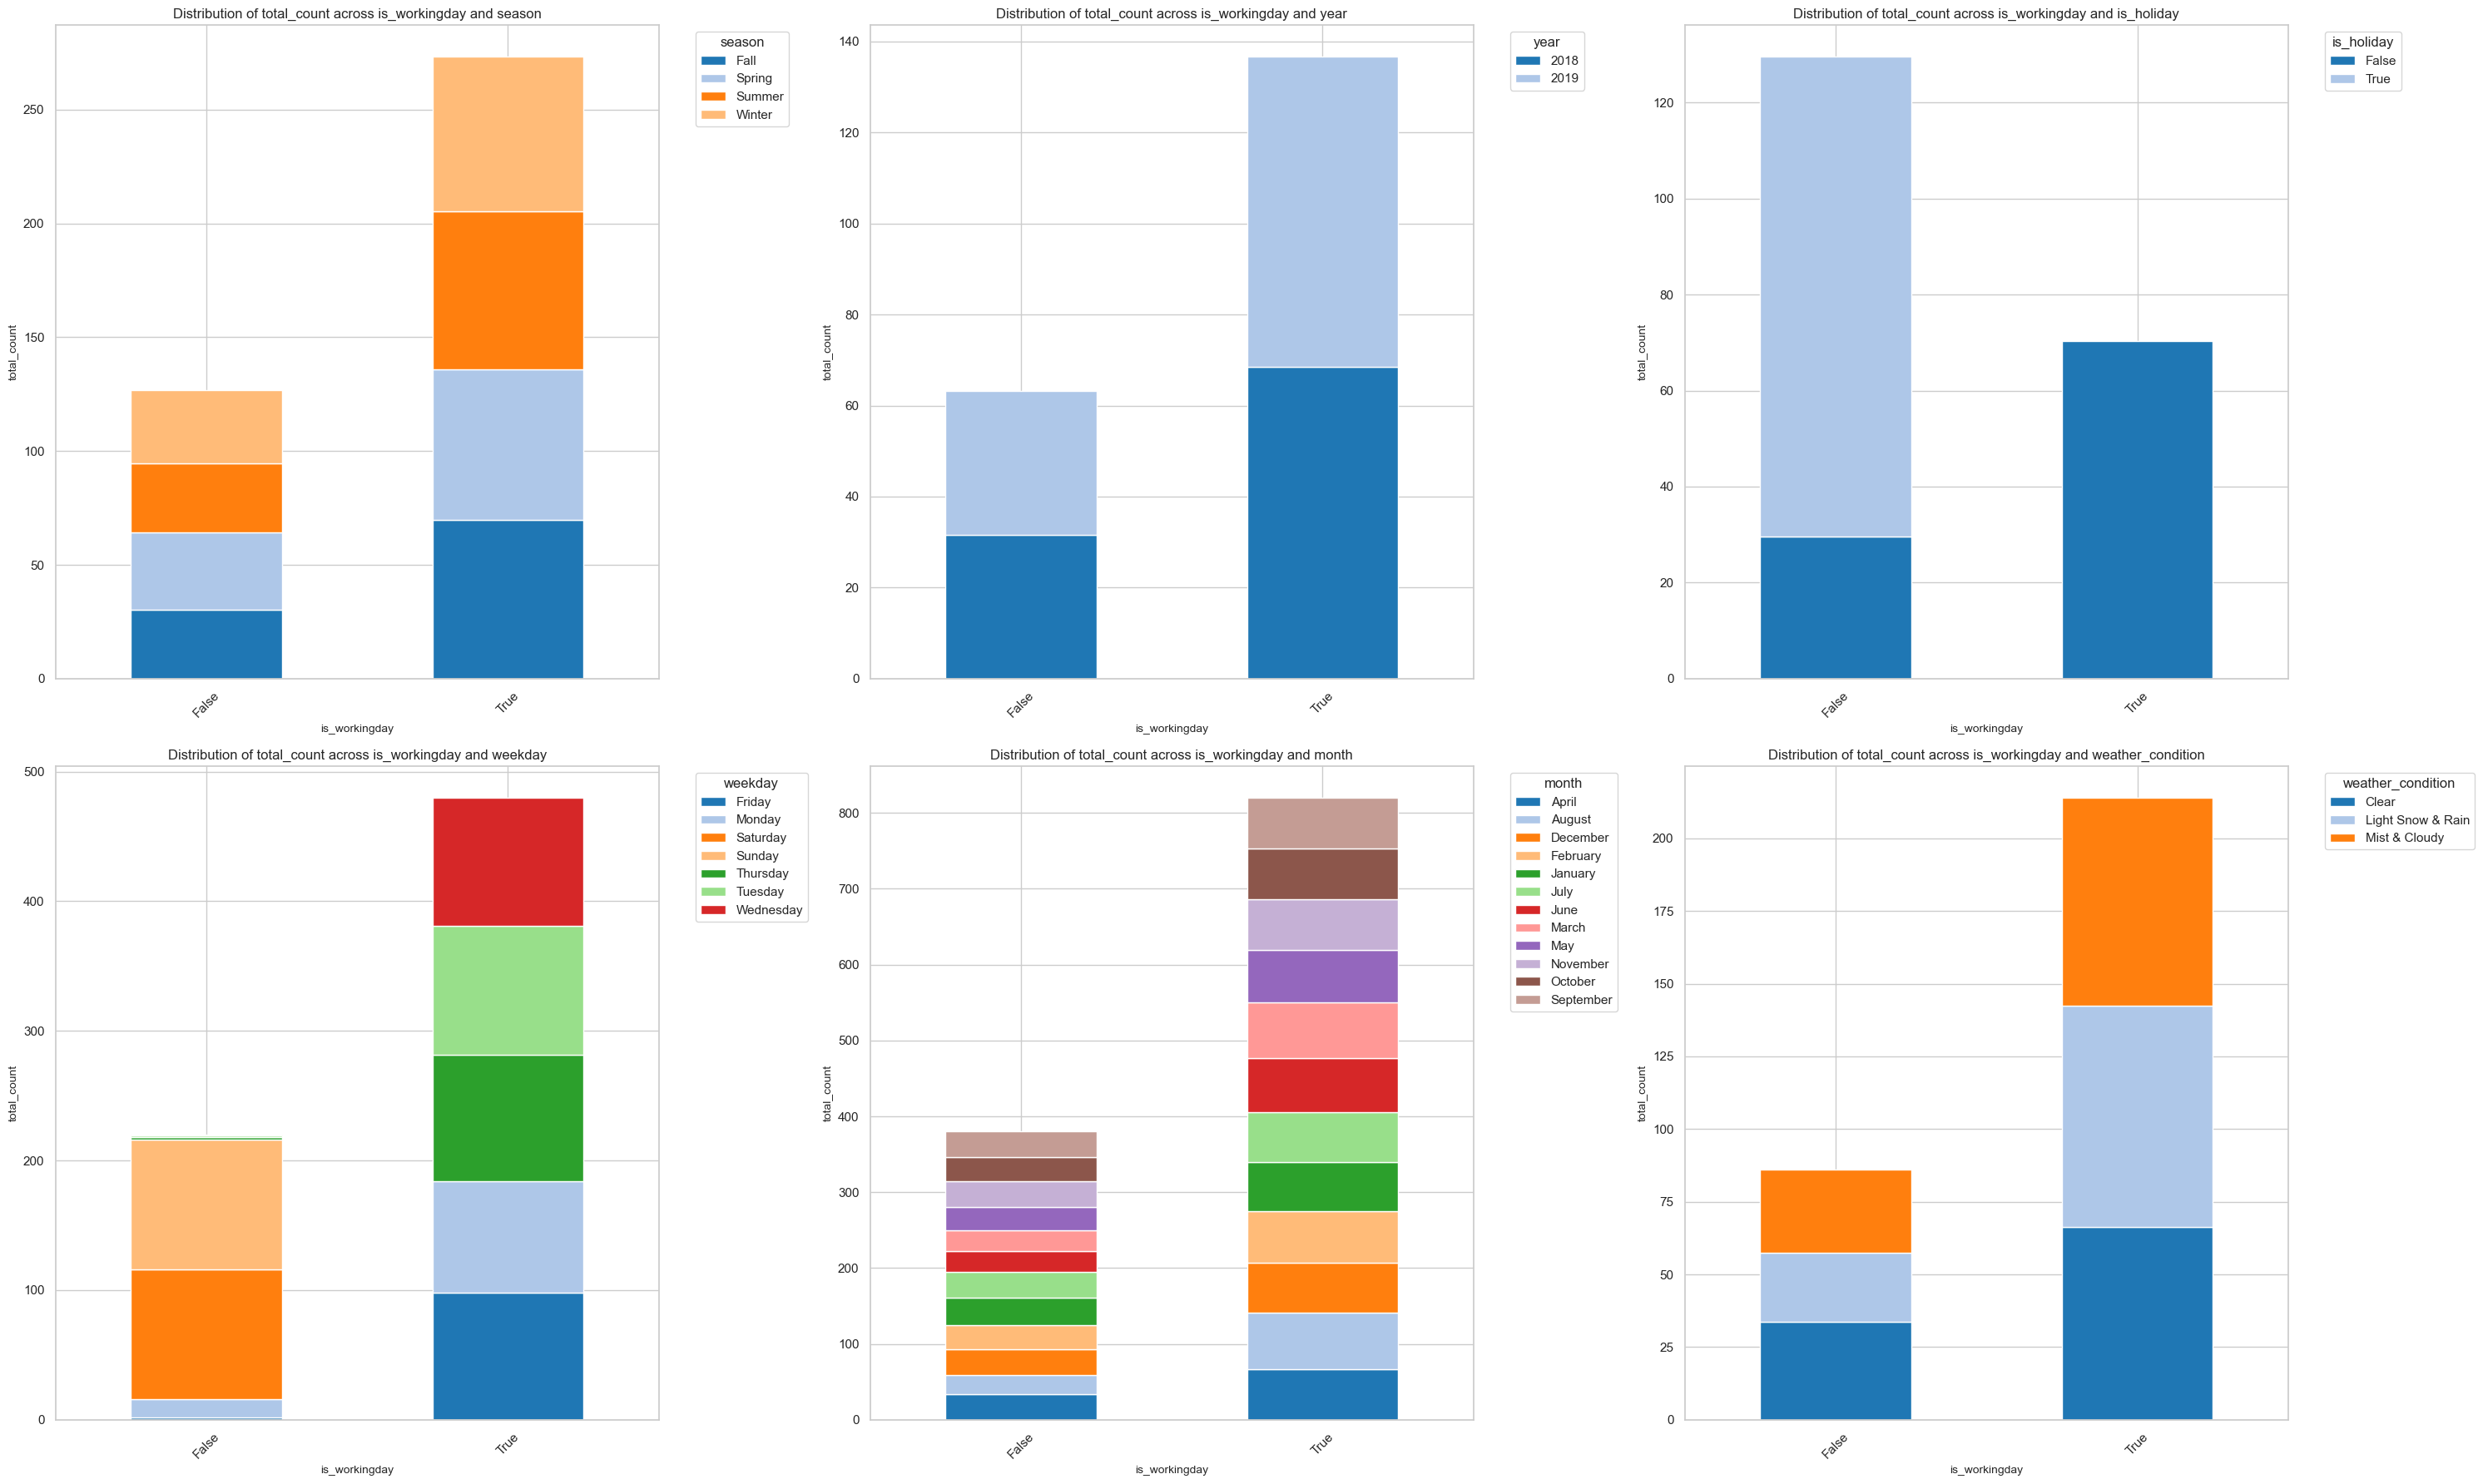

In [43]:
categories = ['season', 'year', 'is_holiday', 'weekday', 'month', 'weather_condition']
target_column = 'is_workingday'
value_column = 'total_count'

result = analyze_categorical_relationships(df_clean, categories, target_column, value_column)

length = len(categories)
fig, axes = plt.subplots(nrows=(length) // 3, ncols=3, figsize=(30, 18))
axes = axes.flatten()

for i in range(length):
        category = categories[i]
        table = result[categories[i]]  
        plot_categorical_relationships(table, category, target_column, value_column, axes[i])      
plt.tight_layout()
plt.show()

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

for i in range(length):
        table = result[categories[i]]  
        display(HTML(table.reset_index().to_html()))      

### Seasonal, Yearly, and Monthly Bike Sharing Patterns:

1. **Season vs. Working Day:**
   - **Fall:**
     - False (Non-Working Day): 30.32%
     - True (Working Day): 69.68%
   - **Spring:**
     - False (Non-Working Day): 33.89%
     - True (Working Day): 66.11%
   - **Summer:**
     - False (Non-Working Day): 30.43%
     - True (Working Day): 69.57%
   - **Winter:**
     - False (Non-Working Day): 32.02%
     - True (Working Day): 67.98%
   - Bike sharing usage varies by season, with higher percentages on working days across all seasons.

2. **Year vs. Working Day:**
   - **Year 2018:**
     - False (Non-Working Day): 31.51%
     - True (Working Day): 68.49%
   - **Year 2019:**
     - False (Non-Working Day): 31.78%
     - True (Working Day): 68.22%
   - Similar distribution of working and non-working days across both years, with slight variations between 2018 and 2019.

3. **is_holiday vs. Working Day:**
   - **Not a is_holiday (False):**
     - False (Non-Working Day): 29.62%
     - True (Working Day): 70.38%
   - **is_holiday (True):**
     - False (Non-Working Day): 100.0%
     - True (Working Day): 0.0%
   - is_holidays are exclusively non-working days (False), with no data available for is_holidays being working days (True).

4. **Month vs. Working Day:**
   - This table breaks down the percentage distribution across months based on whether it's a working day or not. For instance:
     - In January, 35.48% of bike sharing occurs on non-working days (False), and 64.52% on working days (True).
     - This pattern varies slightly across months but generally shows higher usage on working days compared to non-working days.

5. **weather_condition vs. Working Day:**
   - **weather_condition Bad:**
     - False (Non-Working Day): 23.81%
     - True (Working Day): 76.19%
   - **weather_condition Good:**
     - False (Non-Working Day): 33.69%
     - True (Working Day): 66.31%
   - **weather_condition Moderate:**
     - False (Non-Working Day): 28.46%
     - True (Working Day): 71.54%
   - Bike sharing usage varies significantly depending on weather conditions and whether it's a working day or not, with higher usage on working days across all weather situations.

### Summary:
- Bike sharing is more frequent on working days compared to non-working days across different categories such as years, is_holidays, months, and seasons.
- is_holidays exclusively have more bike sharing usage than non-working days.
- Weather conditions influence bike sharing, as the highest usage is during the good weather on working days.
- Seasons also impact bike sharing patterns, with consistent higher usage on working days across all seasons.

## Multivariate Analysis

In [44]:
# A class for performing multivariate analysis on a DataFrame.
class MultivariateAnalysis:
    def __init__(self, dataframe):
        self.dataframe = dataframe
    
    # Generates a heatmap for visualizing the correlation matrix of numerical columns in the DataFrame. 
    def heatmap(self, cmap='coolwarm'):
        sns.set(style="white")
        plt.figure(figsize=(10, 8))
        sns.heatmap(self.dataframe.corr(), cmap=cmap, annot=True, fmt=".2f", linewidths=0.5)
        plt.title('Correlation Matrix Heatmap', fontsize=16)
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

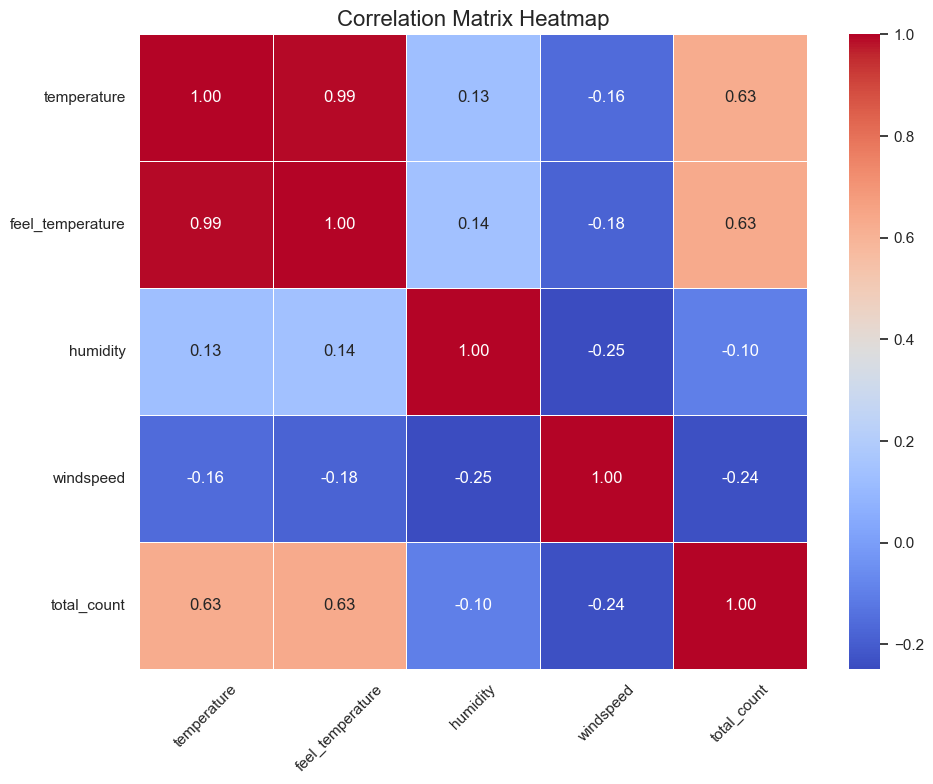

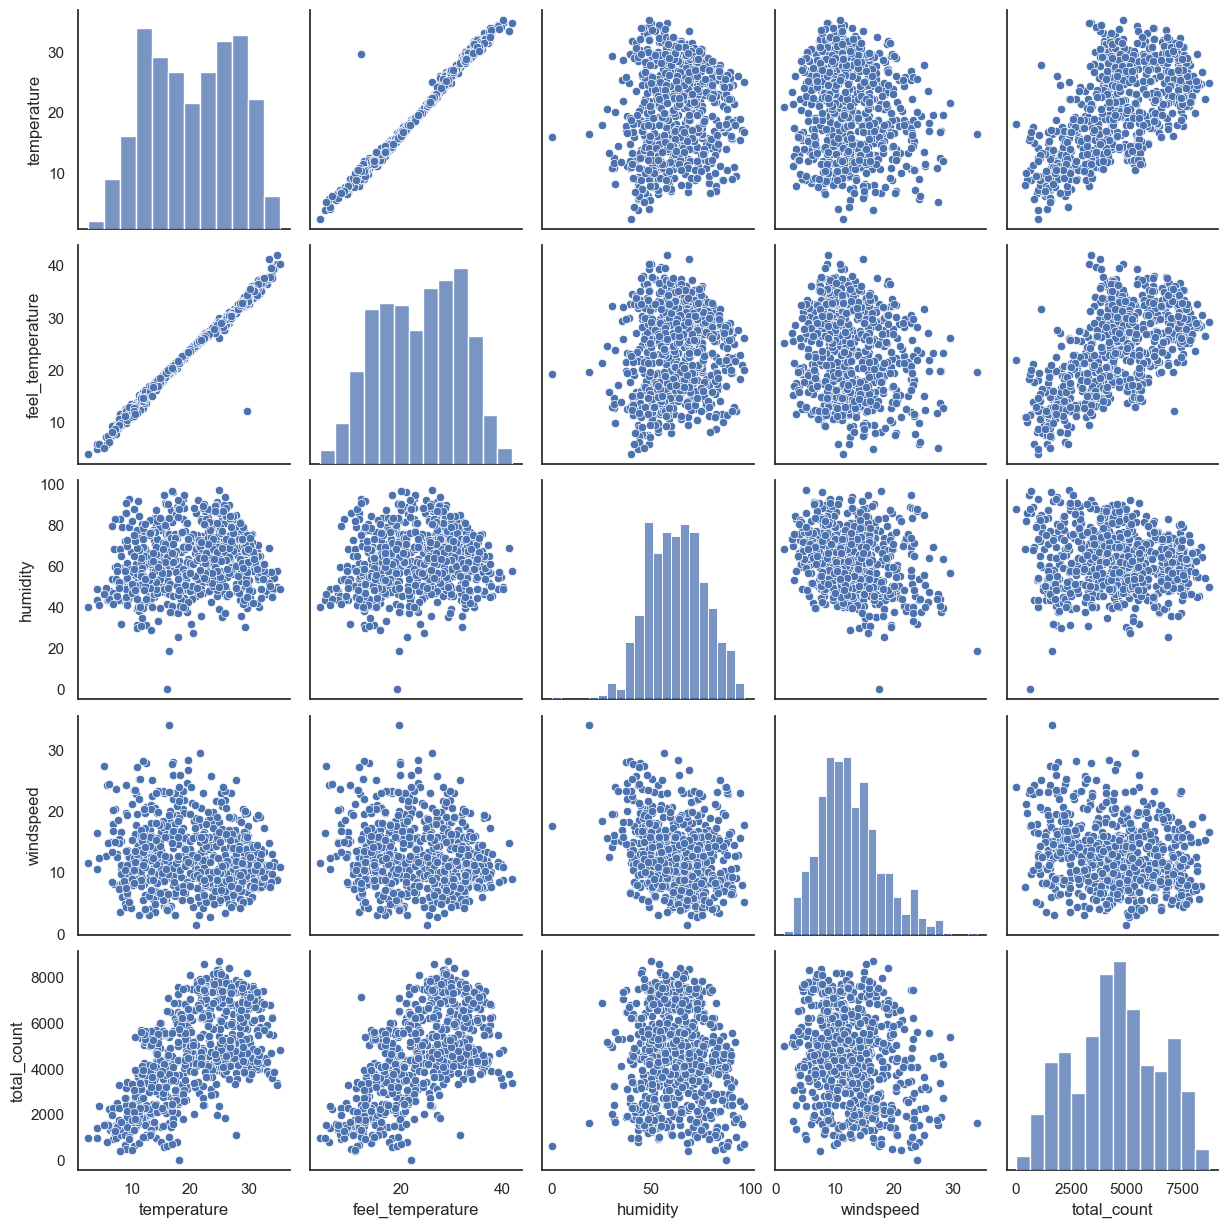

In [45]:
# Generating a heatmap to visualize the correlation matrix of numerical columns in the DataFrame
df_heatmap = df_clean[numerical_columns]
multivariate_analysis = MultivariateAnalysis(df_heatmap)
multivariate_analysis.heatmap()
# Creating pair plot for visualisation
sns.pairplot(df_clean)

### Graph Observations and Summary:

1. **Temperature:** Strong positive correlation with feel temperature (nearly 1.0). Weak positive correlation with casual riders (0.54) and registered riders (0.54). Very weak positive correlation with total count (0.63).

2. **Feel Temperature:** Very strong positive correlation with temperature. Weak positive correlation with casual riders (0.54), registered riders (0.54), and total count (0.63).

3. **Humidity:** Weak negative correlation with temperature (-0.16), feel temperature (-0.18), casual riders (-0.08), registered riders (-0.09), and total count (-0.10).

4. **Windspeed:** Weak negative correlation with temperature (-0.16), feel temperature (-0.18), casual riders (-0.17), registered riders (-0.22), and total count (-0.24).

5. **Total Count:** Very strong positive correlation with casual riders (0.67) and registered riders (0.95). Weak positive correlation with temperature (0.63) and feel temperature (0.63).

# Modelling

## Preparing the data for Modelling

##### 1. Encoding 
- Converting the categorical variables : Binaries to 0 and 1
- Converting the categorical variables : Non-binaries to Dummy Variables and Dropping the redundant Dummy
##### 2. Data Splitting 
- Split the data into train and test data
##### 3. Rescaling
- Rescaling the variables(columns) 

##### Define

##### 1. Encoding 
- Converting the categorical variables : Binaries to 0 and 1
- Converting the categorical variables : Non-binaries to Dummy Variables and Dropping the redundant Dummy

##### Code

In [46]:
# Converting the categorical variables : Binaries to 0 and 1
binary_categorical_columns = ['is_holiday','is_workingday']
year_categorical_columns = ['year']
categorical_values(df_clean, binary_categorical_columns)

print("\n Converting the categorical variables : Binaries to 0 and 1 ...")
df_clean[binary_categorical_columns] = df_clean[binary_categorical_columns].apply(lambda x: x.map({'True':1, 'False':0}))
df_clean[year_categorical_columns] = df_clean[year_categorical_columns].apply(lambda x: x.map({'2018':0, '2019':1}))


 Converting the categorical variables : Binaries to 0 and 1 ...


In [47]:
df_clean.head()

season year    month is_holiday    weekday is_workingday weather_condition  \
0  Spring    0  January          0   Saturday             0     Mist & Cloudy   
1  Spring    0  January          0     Sunday             0     Mist & Cloudy   
2  Spring    0  January          0     Monday             1             Clear   
3  Spring    0  January          0    Tuesday             1             Clear   
4  Spring    0  January          0  Wednesday             1             Clear   

   temperature  feel_temperature  humidity  windspeed  total_count  
0    14.110847          18.18125   80.5833  10.749882          985  
1    14.902598          17.68695   69.6087  16.652113          801  
2     8.050924           9.47025   43.7273  16.636703         1349  
3     8.200000          10.60610   59.0435  10.739832         1562  
4     9.305237          11.46350   43.6957  12.522300         1600

In [48]:
# Converting the categorical variables : Non-binaries to Dummy Variables and Dropping the redundant Dummy
dummy_categorical_columns = ['season','month','weekday','weather_condition']
categorical_values(df_clean, dummy_categorical_columns)

print("\n Converting the categorical variables : Non-binaries to Dummy Variables ...")
dummy_data = pd.get_dummies(data=df_clean[dummy_categorical_columns],dtype=int, drop_first=True)
df_clean = pd.concat([df_clean, dummy_data], axis=1)
df_clean = df_clean.drop(columns=dummy_categorical_columns, axis=1)




 Converting the categorical variables : Non-binaries to Dummy Variables ...


##### Test

In [49]:
# Test the encoding for categorical columns 
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   year                                 730 non-null    category
 1   is_holiday                           730 non-null    category
 2   is_workingday                        730 non-null    category
 3   temperature                          730 non-null    float64 
 4   feel_temperature                     730 non-null    float64 
 5   humidity                             730 non-null    float64 
 6   windspeed                            730 non-null    float64 
 7   total_count                          730 non-null    int64   
 8   season_Spring                        730 non-null    int64   
 9   season_Summer                        730 non-null    int64   
 10  season_Winter                        730 non-null    int64   
 11  month_August       

year is_holiday is_workingday  temperature  feel_temperature  humidity  \
0    0          0             0    14.110847          18.18125   80.5833   
1    0          0             0    14.902598          17.68695   69.6087   
2    0          0             1     8.050924           9.47025   43.7273   
3    0          0             1     8.200000          10.60610   59.0435   
4    0          0             1     9.305237          11.46350   43.6957   

   windspeed  total_count  season_Spring  season_Summer  ...  month_October  \
0  10.749882          985              1              0  ...              0   
1  16.652113          801              1              0  ...              0   
2  16.636703         1349              1              0  ...              0   
3  10.739832         1562              1              0  ...              0   
4  12.522300         1600              1              0  ...              0   

   month_September  weekday_Monday  weekday_Saturday  weekday_Sunday  \
0                0               0                 1               0   
1                0               0                 0               1   
2                0               1                 0               0   
3                0               0                 0               0   
4                0               0                 0               0   

   weekday_Thursday  weekday_Tuesday  weekday_Wednesday  \
0                 0                0                  0   
1                 0                0                  0   
2                 0                0                  0   
3                 0                1                  0   
4                 0                0                  1   

   weather_condition_Light Snow & Rain  weather_condition_Mist & Cloudy  
0                                    0                                1  
1                                    0                                1  
2                                    0                                0  
3                                    0                                0  
4                                    0                                0  

[5 rows x 30 columns]

##### Define

##### 2. Data Splitting 
- Split the data into train and test data

##### Code

In [50]:
df_train, df_test = train_test_split(df_clean, train_size=0.7, random_state=100)

##### Test

In [51]:
# Shape of the training data
print("Shape of Train Data : ", df_train.shape)

# Shape of the test data
print("Shape of Test Data : ", df_test.shape)

Shape of Train Data :  (510, 30)
Shape of Test Data :  (220, 30)


##### Define

##### 3. Rescaling
__Rescaling the variables(columns)__ : Scaling of variables is an important step because, the variable ‘total_count’ is on a different scale with respect to all other numerical variables, which take very small values. Also, the categorical variables that you encoded earlier take either 0 or 1 as their values. Hence, it is important to have everything on the same scale for the model to be easily interpretable.

The two popular rescaling methods-
- Min-Max scaling (normalisation) : Between 0 and 1
- Standardisation (mean=0 and sigma=1).

The advantage of Standardisation over the other is that it doesn't compress the data between a particular range as in Min-Max scaling. 

Here we will use Min-Max scaling because we have got few outliers.

##### Code

In [52]:
# Instantiate an object to scale only numerical variables that are not encoded
scaler = MinMaxScaler()

# Numerical variables that require scaling
print("Numerical Columns : ",numerical_columns)

# Fit on the data
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])

Numerical Columns :  ['temperature', 'feel_temperature', 'humidity', 'windspeed', 'total_count']


##### Test

In [53]:
df_train[numerical_columns].describe()

temperature  feel_temperature    humidity   windspeed  total_count
count   510.000000        510.000000  510.000000  510.000000   510.000000
mean      0.537440          0.513156    0.650480    0.320883     0.513499
std       0.225858          0.212410    0.145846    0.169803     0.224421
min       0.000000          0.000000    0.000000    0.000000     0.000000
25%       0.339853          0.332086    0.538643    0.199179     0.356420
50%       0.542596          0.529718    0.653714    0.296763     0.518638
75%       0.735215          0.688457    0.754830    0.414447     0.684710
max       1.000000          1.000000    1.000000    1.000000     1.000000

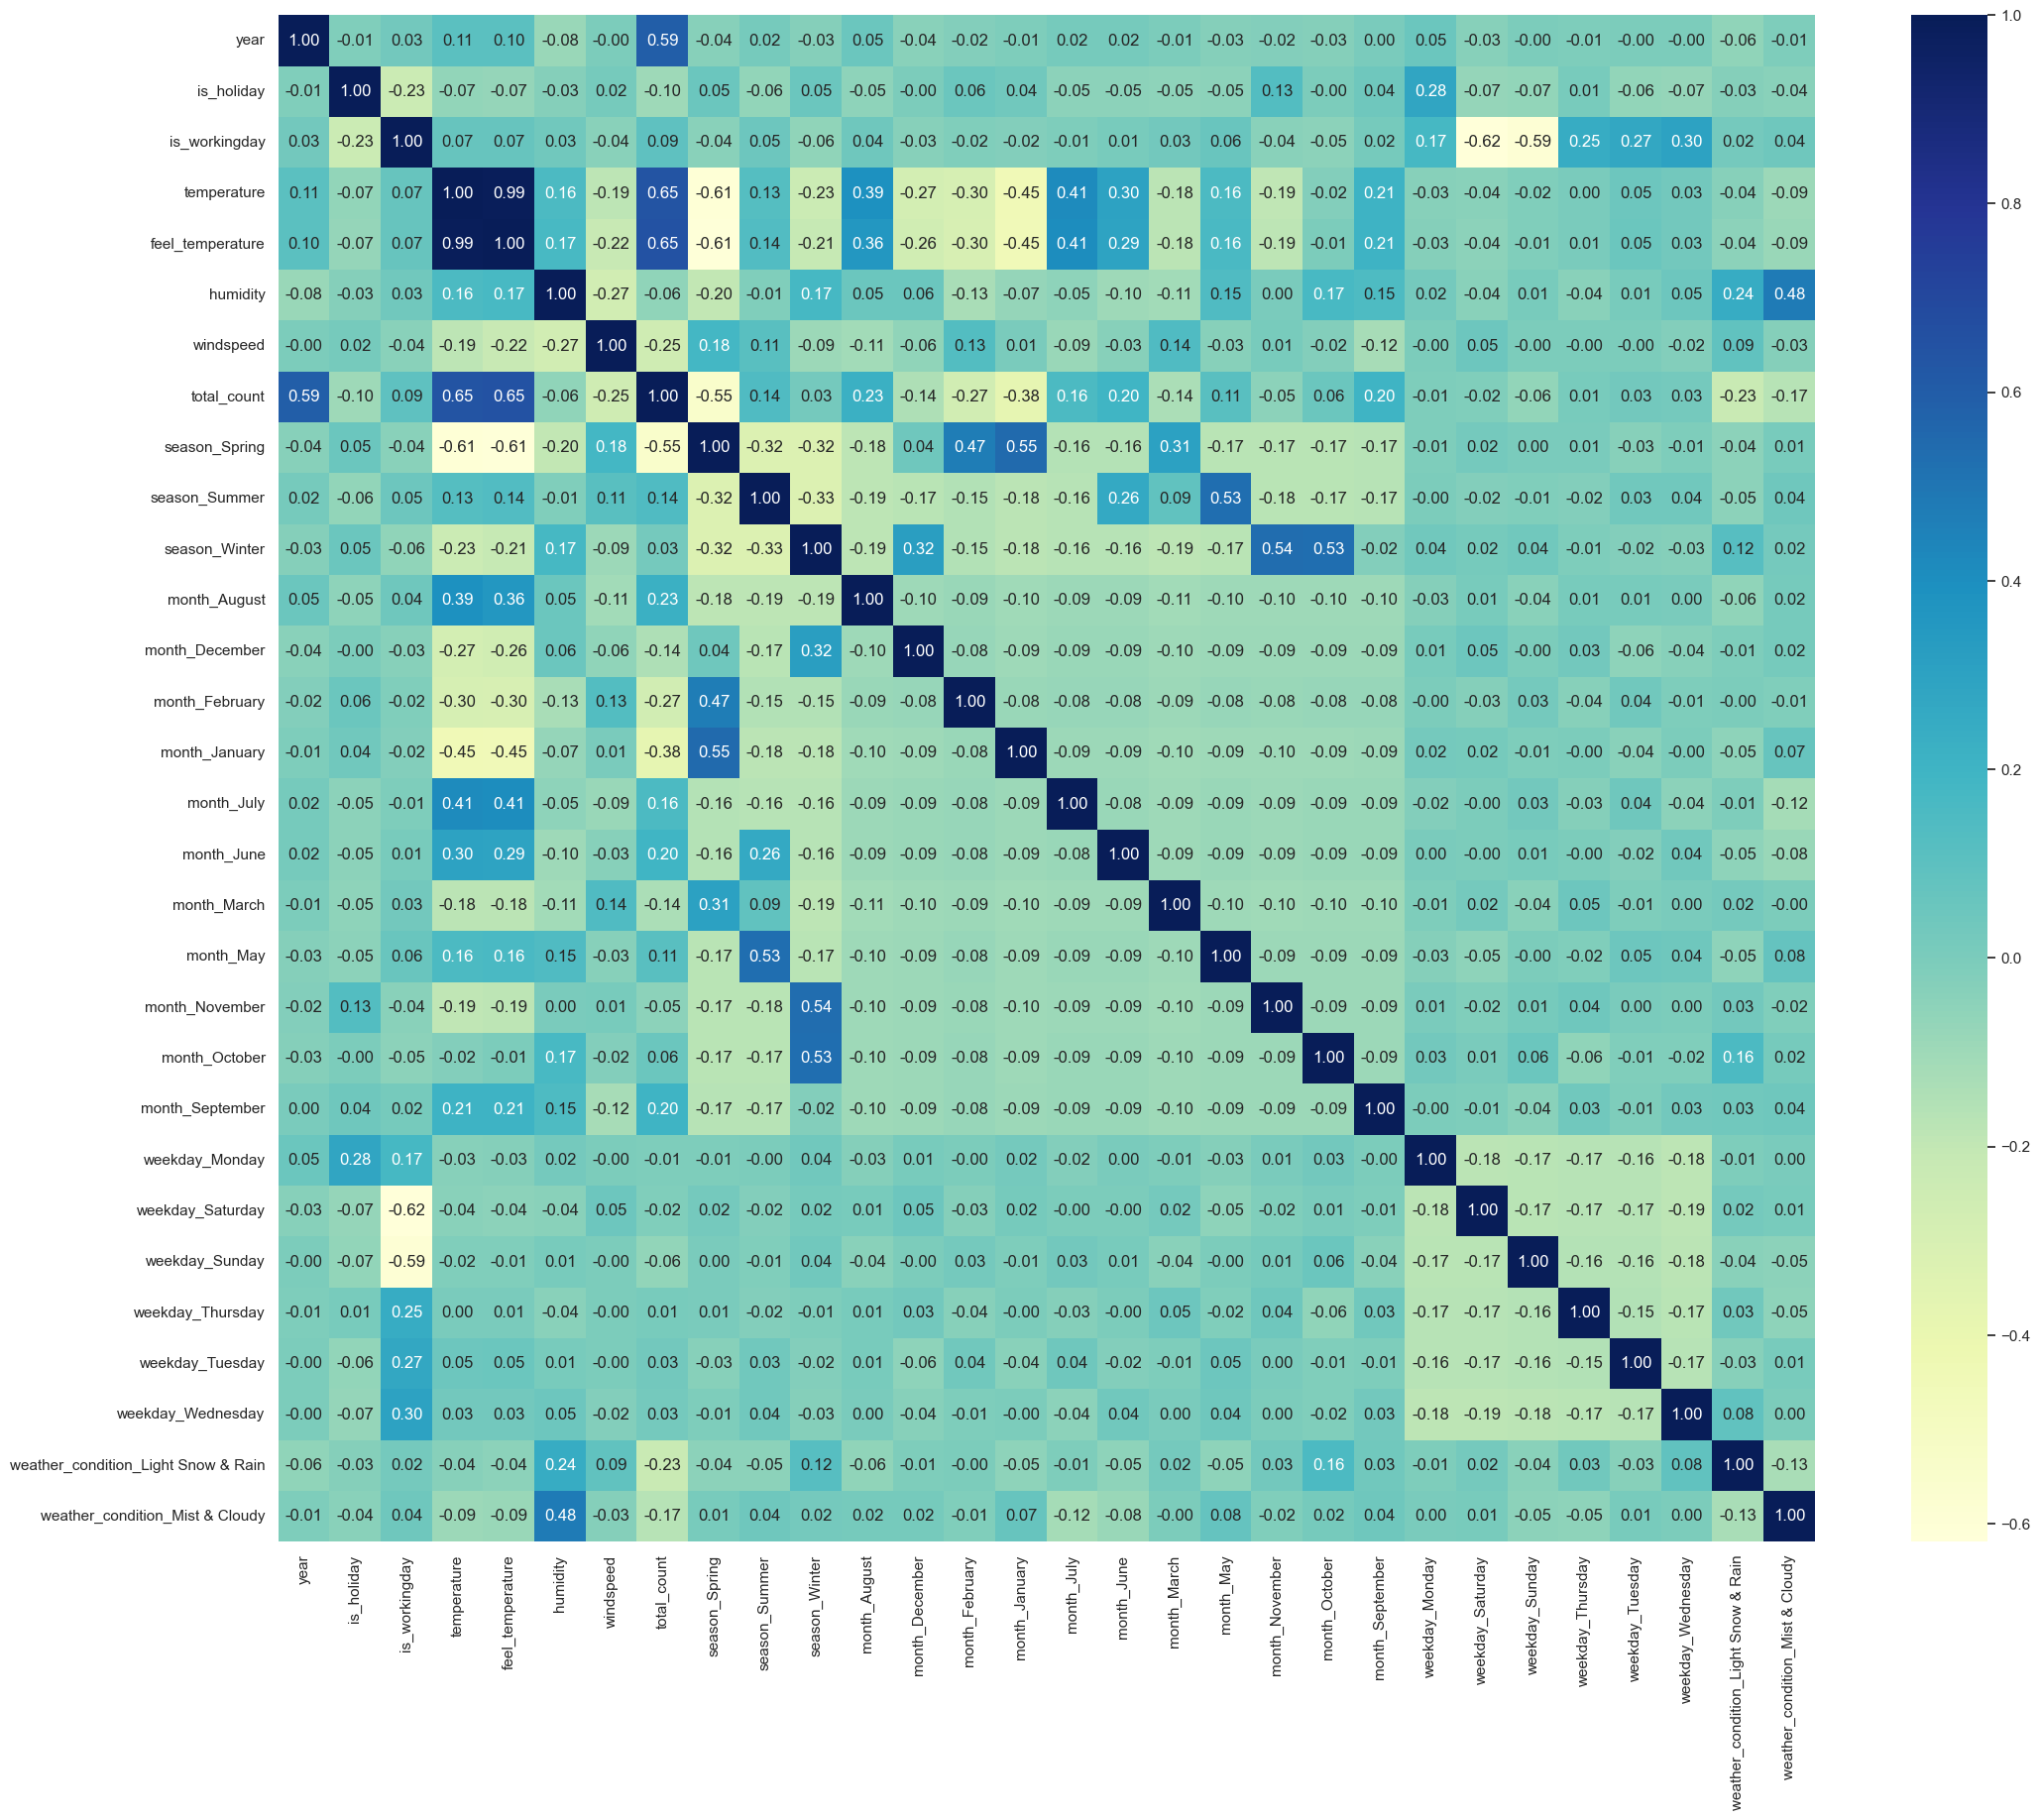

In [54]:
# lets see the correlation of df_train 
plt.figure(figsize= [25,20])
sns.heatmap(df_train.corr() , annot= True , cmap ='YlGnBu', fmt='.2f')
plt.show()

## Summary of Correlation Matrix Analysis:

#### 1. **Strong Positive Correlations:**
   - **Temperature and Feel Temperature (0.99):**
   - **Total Count and Temperature (0.66):**
   - **Total Count and Year (0.59):**

#### 2. **Moderate Positive Correlations:**
   - **Total Count and Feel Temperature (0.65):**
   - **Total Count and is_Workingday (0.31):**
   - **Total Count and Humidity (0.27):**

#### 3. **Negative Correlations:**
   - **Total Count and Weather Condition - Light Snow & Rain (-0.25):**
   - **Total Count and Windspeed (-0.23):**

#### 4. **Season and Month Correlations:**
   - **Total Count and Season_Spring (0.55):**
   - **Total Count and Month_September (0.22):**
   - **Total Count and Season_Winter (0.32):**
     
#### 5. **Multicollinearity Insights:**
   - **Temperature and Feel Temperature (0.99):**
   - **High correlation between certain months and seasons:**

## Creating Linear Model, VIF and Analyze Feature Functions

In [55]:
def create_linear_model(x_train):
    # Creating a X_train dataset with selected variables
    df = sm.add_constant(x_train)  # Adding a constant variable
    lr = sm.OLS(y_train, df)  # Create a model
    lr_model = lr.fit()  # Fit the Model
    return lr_model
    
def calculate_vif(x_train):
    # Funcation to calculate VIF
    vif = pd.DataFrame()
    vif['Features'] = x_train.columns
    vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    vif = vif.reset_index(drop=True)
    return vif
    
def analyze_features(p_values, vif, col):
    # Function to enable analyzing the features and help in identifying non-significant predictors
    high_p_high_vif = []
    high_p_low_vif = []
    low_p_high_vif = []
    low_p_low_vif = []

    for feature in col:
        p_value = p_values[feature]
        vif_value = vif.loc[vif['Features'] == feature, 'VIF'].values[0]
        if p_value > 0.05 and vif_value > 5:
            high_p_high_vif.append(feature)
        elif p_value > 0.05 and vif_value <= 5:
            high_p_low_vif.append(feature)
        elif p_value <= 0.05 and vif_value > 5:
            low_p_high_vif.append(feature)
        elif p_value <= 0.05 and vif_value <= 5:
            low_p_low_vif.append(feature)

    result = {
        "high_p_high_vif": high_p_high_vif,
        "high_p_low_vif": high_p_low_vif,
        "low_p_high_vif": low_p_high_vif,
        "low_p_low_vif": low_p_low_vif
    }

    return result

## Dividing into X and Y sets for model building

In [56]:
# Calculate the X_train and Y_train
y_train = df_train.pop('total_count')
X_train = df_train

## Variable Selection using RFE

Recursive feature elimination as there are many variables so we will use RFE Technique to enable autmation of removal multicollinear feature.

In [57]:
#  Running RFE with an arbitary output number of the variable number 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [58]:
# List the predictor varaibles that have got the rfe_support.
df_rfe_support = pd.DataFrame()
df_rfe_support[['Columns','Support','Ranking']] = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
df_rfe_support.sort_values('Ranking').reset_index(drop=True)

Columns  Support  Ranking
0                                  year     True        1
1                      weekday_Saturday     True        1
2                       month_September     True        1
3   weather_condition_Light Snow & Rain     True        1
4                         month_January     True        1
5                         season_Winter     True        1
6                         season_Summer     True        1
7                            month_July     True        1
8                             windspeed     True        1
9                            is_holiday     True        1
10                        is_workingday     True        1
11                        season_Spring     True        1
12                          temperature     True        1
13      weather_condition_Mist & Cloudy     True        1
14                             humidity     True        1
15                       month_November    False        2
16                       month_December    False        3
17                       month_February    False        4
18                     feel_temperature    False        5
19                            month_May    False        6
20                         month_August    False        7
21                       weekday_Sunday    False        8
22                       weekday_Monday    False        9
23                      weekday_Tuesday    False       10
24                     weekday_Thursday    False       11
25                    weekday_Wednesday    False       12
26                        month_October    False       13
27                           month_June    False       14
28                          month_March    False       15

In [59]:
# Variables that have got the RFE support
rfe_true_col = X_train.columns[rfe.support_]
rfe_true_col

Index(['year', 'is_holiday', 'is_workingday', 'temperature', 'humidity',
       'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'month_January', 'month_July', 'month_September', 'weekday_Saturday',
       'weather_condition_Light Snow & Rain',
       'weather_condition_Mist & Cloudy'],
      dtype='object')

In [60]:
# Variables that dont have the RFE support
rfe_false_col = X_train.columns[~rfe.support_]
rfe_false_col

Index(['feel_temperature', 'month_August', 'month_December', 'month_February',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'weekday_Monday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [61]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[rfe_true_col]

In [62]:
# Creating a list to store the insignificant_predictors
insignificant_predictors = list()

## Building the Model

- Using the columns that are RFE supported.
- Identify the Statistical Significance of Variables
- Identify the Variance Inflation Factor (VIF) for Correlated Variables

### Initial Model

Initial Model with all variables to understand what we need to improve on

In [63]:
# Initial Model with all variables to understand what we need to improve on
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train , X_train_sm)
lm_model = lr.fit()
lm_model.summary()

#calculate the VIF 
vif = calculate_vif(X_train)

col = X_train.columns.to_list()
result = analyze_features(lm_model.pvalues, vif, col)

print("Linear Regression Stats : \n",lm_model.summary())
print("\nVIF : \n", vif)
print("\nPredictor variables to drop from the model : \n", json.dumps(result, indent=4))

Linear Regression Stats : 
                             OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          2.81e-180
Time:                        11:30:32   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

### Model-1

Creating a model with X_train_rfe (predictors having the rfe_support)

In [64]:
#Creating Model with X_train_rfe
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train , X_train_sm)
lm_model = lr.fit()
lm_model.summary()

#calculate the VIF 
vif = calculate_vif(X_train_rfe)

col = X_train_rfe.columns.to_list()
result = analyze_features(lm_model.pvalues, vif, col)

print("Linear Regression Stats : \n",lm_model.summary())
print("\nVIF : \n", vif)
print("\nPredictor variables to drop from the model : \n", json.dumps(result, indent=4))

Linear Regression Stats : 
                             OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          4.22e-191
Time:                        11:30:32   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

### Model-2

Dropping the predictor variable `humidity` as it has a very high VIF.

In [65]:
# Dropping the predictor variable `humidity` as it has a very high VIF.
predictor = ['humidity']
X_train_new_1 = X_train_rfe.drop(predictor, axis = 1)
lm_model_1 = create_linear_model(X_train_new_1)

#calculate the VIF 
vif = calculate_vif(X_train_new_1)
col = X_train_new_1.columns.to_list()
result = analyze_features(lm_model_1.pvalues, vif, col)

print("Linear Regression Stats : \n",lm_model_1.summary())
print("\nVIF : \n", vif)
print("\nPredictor variables to drop from the model : \n", json.dumps(result, indent=4))

# Appending the insignificant parameters to a list
insignificant_predictors.extend(predictor)

Linear Regression Stats : 
                             OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.60e-188
Time:                        11:30:32   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

### Model-3

Dropping the predictor variable `is_workingday` as it has got a high VIF. However we are not considering `temperature` despite it having a high VIF is due to a significant drop in the R2 value of the model.

In [66]:
# Dropping the predictor variable `is_workingday` as it has got a high VIF. 
# However we are not considering `temperature` despite it having a high VIF is due to a significant drop in the R2 value of the model.

predictor = ['is_workingday']
X_train_new_2 = X_train_new_1.drop(predictor, axis = 1)
lm_model_2 = create_linear_model(X_train_new_2)

#calculate the VIF 
vif = calculate_vif(X_train_new_2)
col = X_train_new_2.columns.to_list()
result = analyze_features(lm_model_2.pvalues, vif, col)

print("Linear Regression Stats : \n",lm_model_2.summary())
print("\nVIF : \n", vif)
print("\nPredictor variables to drop from the model : \n", json.dumps(result, indent=4))

# Appending the insignificant parameters to a list
insignificant_predictors.extend(predictor)

Linear Regression Stats : 
                             OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          2.48e-186
Time:                        11:30:32   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

### Model-4

Dropping the predictor variable `weekday_Saturday` because of its high_p value.

In [67]:
# Dropping the predictor variable `weekday_Saturday` because of its high_p value.
predictor = ['weekday_Saturday']
X_train_new_3 = X_train_new_2.drop(predictor, axis = 1)
lm_model_3 = create_linear_model(X_train_new_3)

#calculate the VIF 
vif = calculate_vif(X_train_new_3)
col = X_train_new_3.columns.to_list()
result = analyze_features(lm_model_3.pvalues, vif, col)

print("Linear Regression Stats : \n",lm_model_3.summary())
print("\nVIF : \n", vif)
print("\nPredictor variables to drop from the model : \n", json.dumps(result, indent=4))

# Appending the insignificant parameters to a list
insignificant_predictors.extend(predictor)

Linear Regression Stats : 
                             OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          8.14e-187
Time:                        11:30:32   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

### Model-5

Dropping the predictor variable `season_Summer` because of it being not so significant variable as dropping `temperature` leads to significant drop in the R2 value of the model

In [68]:
# Dropping the predictor variable `season_Summer` because of it being not so significant variable as dropping `temperature` leads to 
# significant drop in the R2 value of the model
predictor = ['season_Summer']
X_train_new_4 = X_train_new_3.drop(predictor, axis = 1)
X_train_sm_4 = sm.add_constant(X_train_new_4)  # Adding a constant variable
lr_4 = sm.OLS(y_train, X_train_sm_4)  # Create a model
lm_model_4 = lr_4.fit()  # Fit the Model

#calculate the VIF 
vif = calculate_vif(X_train_new_4)
col = X_train_new_4.columns.to_list()
result = analyze_features(lm_model_4.pvalues, vif, col)

print("Linear Regression Stats : \n",lm_model_4.summary())
print("\nVIF : \n", vif)
print("\nPredictor variables to drop from the model : \n", json.dumps(result, indent=4))

# Appending the insignificant parameters to a list
insignificant_predictors.extend(predictor)

Linear Regression Stats : 
                             OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.7
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          2.87e-186
Time:                        11:30:32   Log-Likelihood:                 497.01
No. Observations:                 510   AIC:                            -970.0
Df Residuals:                     498   BIC:                            -919.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

## Residual Analysis

Checking if the error_terms are also normally distributed. Doing this by plotting a histogram for the error_terms

In [69]:
# Predicting the y_train using the final_model `lm_model_4`
y_train_pred = lm_model_4.predict(X_train_sm_4)

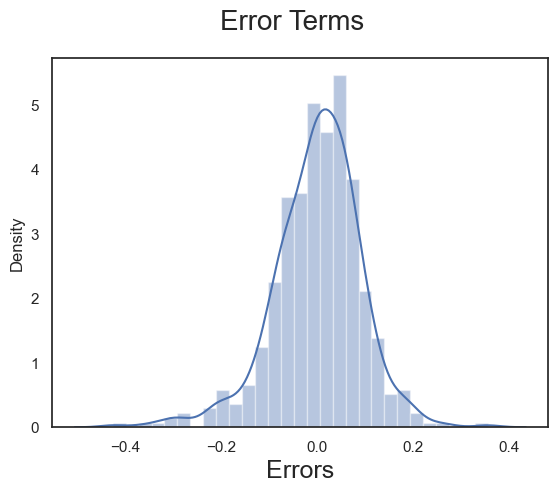

In [70]:
# Calculating the residuals or the error_terms
residuals = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residuals)

fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         
plt.show()

We can clearly see that the error terms are centred around 0 and follow a normal distribution, which is in accordance with the assumptions of linear regression.

#### Q-Q Plot

Checking if the error_terms are also normally distributed. Doing this by plotting a q-q plot for the error_terms

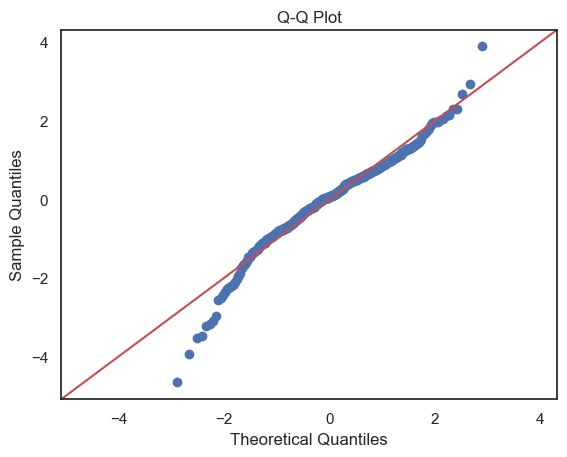

In [71]:
# Normality of the Errors

sm.qqplot(residuals, fit=True, line='45')
plt.title('Q-Q Plot')
plt.show()

We see that most of the data points lie on the predicted straight line , indicating that the error terms are normally distributed .

### Homoscedasticity

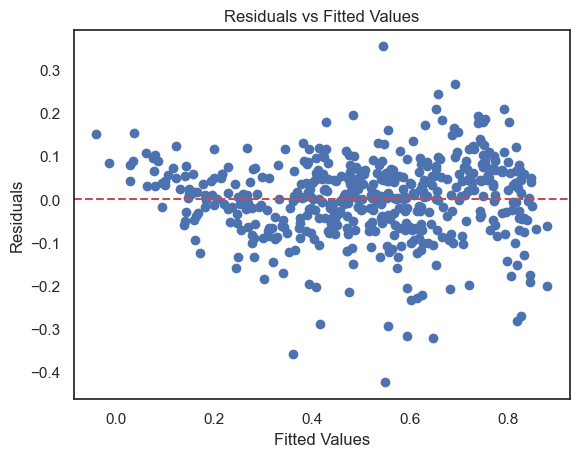

In [72]:
# Valdiating if the residuals have constant variance.

fitted_values = lm_model_4.fittedvalues

plt.scatter(y_train_pred, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

The plot shows a random scatter of points around the zero line, with no clear pattern indicating that the assumption of homoscedasticity is met.

## Prediction and Evaluation on Test Set

In [73]:
# Numerical variables that require scaling
print("Numerical Columns : ",numerical_columns)

# Fit on the data
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])

Numerical Columns :  ['temperature', 'feel_temperature', 'humidity', 'windspeed', 'total_count']


In [74]:
df_test.describe()

temperature  feel_temperature    humidity   windspeed  total_count  \
count   220.000000        220.000000  220.000000  220.000000   220.000000   
mean      0.558718          0.532847    0.638221    0.313293     0.522154   
std       0.233187          0.217401    0.148694    0.159584     0.219163   
min       0.046591          0.025950    0.261915   -0.042808     0.048205   
25%       0.355429          0.344870    0.529197    0.198843     0.378595   
50%       0.558172          0.544652    0.625590    0.300126     0.524678   
75%       0.755981          0.713308    0.743798    0.402718     0.677750   
max       0.984424          0.980934    1.002146    0.807474     0.963300   

       season_Spring  season_Summer  season_Winter  month_August  \
count     220.000000     220.000000     220.000000    220.000000   
mean        0.254545       0.263636       0.236364      0.059091   
std         0.436599       0.441609       0.425817      0.236333   
min         0.000000       0.000000       0.000000      0.000000   
25%         0.000000       0.000000       0.000000      0.000000   
50%         0.000000       0.000000       0.000000      0.000000   
75%         1.000000       1.000000       0.000000      0.000000   
max         1.000000       1.000000       1.000000      1.000000   

       month_December  ...  month_October  month_September  weekday_Monday  \
count      220.000000  ...     220.000000       220.000000      220.000000   
mean         0.086364  ...       0.086364         0.086364        0.127273   
std          0.281541  ...       0.281541         0.281541        0.334038   
min          0.000000  ...       0.000000         0.000000        0.000000   
25%          0.000000  ...       0.000000         0.000000        0.000000   
50%          0.000000  ...       0.000000         0.000000        0.000000   
75%          0.000000  ...       0.000000         0.000000        0.000000   
max          1.000000  ...       1.000000         1.000000        1.000000   

       weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
count        220.000000      220.000000        220.000000       220.000000   
mean           0.118182        0.145455          0.163636         0.168182   
std            0.323559        0.353363          0.370789         0.374881   
min            0.000000        0.000000          0.000000         0.000000   
25%            0.000000        0.000000          0.000000         0.000000   
50%            0.000000        0.000000          0.000000         0.000000   
75%            0.000000        0.000000          0.000000         0.000000   
max            1.000000        1.000000          1.000000         1.000000   

       weekday_Wednesday  weather_condition_Light Snow & Rain  \
count         220.000000                           220.000000   
mean            0.100000                             0.027273   
std             0.300684                             0.163248   
min             0.000000                             0.000000   
25%             0.000000                             0.000000   
50%             0.000000                             0.000000   
75%             0.000000                             0.000000   
max             1.000000                             1.000000   

       weather_condition_Mist & Cloudy  
count                       220.000000  
mean                          0.318182  
std                           0.466833  
min                           0.000000  
25%                           0.000000  
50%                           0.000000  
75%                           1.000000  
max                           1.000000  

[8 rows x 27 columns]

In [75]:
# Calculate the X_test and Y_test
y_test = df_test.pop('total_count')
X_test = df_test[rfe_true_col]

In [76]:
#Add constant to the linear model
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

const year is_holiday is_workingday  temperature  humidity  windspeed  \
184    1.0    0          1             0     0.831783  0.657364   0.084219   
535    1.0    1          0             1     0.901354  0.610133   0.153728   
299    1.0    0          0             1     0.511964  0.837699   0.334206   
221    1.0    0          0             1     0.881625  0.437098   0.339570   
152    1.0    0          0             1     0.817246  0.314298   0.537414   

     season_Spring  season_Summer  season_Winter  month_January  month_July  \
184              0              0              0              0           1   
535              0              1              0              0           0   
299              0              0              1              0           0   
221              0              0              0              0           0   
152              0              1              0              0           0   

     month_September  weekday_Saturday  weather_condition_Light Snow & Rain  \
184                0                 0                                    0   
535                0                 0                                    0   
299                0                 0                                    0   
221                0                 0                                    0   
152                0                 0                                    0   

     weather_condition_Mist & Cloudy  
184                                1  
535                                0  
299                                1  
221                                0  
152                                0

In [77]:
# Keeping the shape of test dataset same as trained
X_test_sm = X_test_sm.drop(insignificant_predictors,axis=1)

In [78]:
X_test_sm.head()

const year is_holiday  temperature  windspeed  season_Spring  \
184    1.0    0          1     0.831783   0.084219              0   
535    1.0    1          0     0.901354   0.153728              0   
299    1.0    0          0     0.511964   0.334206              0   
221    1.0    0          0     0.881625   0.339570              0   
152    1.0    0          0     0.817246   0.537414              0   

     season_Winter  month_January  month_July  month_September  \
184              0              0           1                0   
535              0              0           0                0   
299              1              0           0                0   
221              0              0           0                0   
152              0              0           0                0   

     weather_condition_Light Snow & Rain  weather_condition_Mist & Cloudy  
184                                    0                                1  
535                                    0                                0  
299                                    0                                1  
221                                    0                                0  
152                                    0                                0

In [79]:
# Predict the y_test_pred value for test dataset
y_test_pred = lm_model_4.predict(X_test_sm)

### Calculating the R-squared score on the test set

In [80]:
# Calculating the R-squared score on the test set
r2 = r2_score(y_true=y_train, y_pred=y_train_pred)
print ("r2_score value of train set : ", round(r2,4))
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
print ("r2_score value of test set : ", round(r2,4))

r2_score value of train set :  0.8341
r2_score value of test set :  0.804


We can see that the r2_score on the test set is 0.804 and the r-r2_score on the trained set 0.834 which is quiet reasonable and nearly equal, which means that data used to train the model has been able to apply those learnings over the test data.

## Model Evaluation

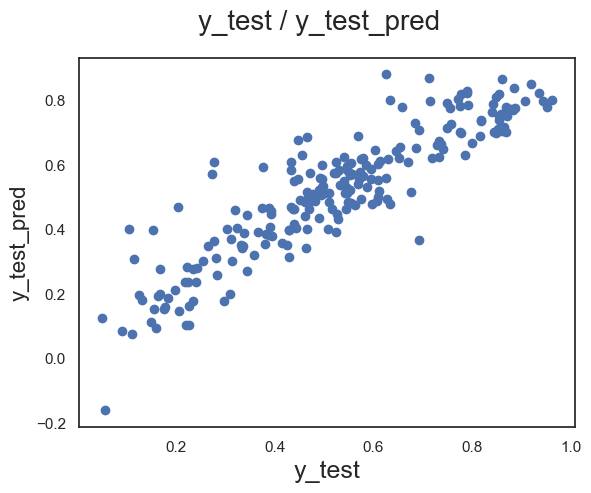

In [81]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test / y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

In [82]:
round(lm_model_4.params,4)

const                                  0.2671
year                                   0.2350
is_holiday                            -0.0972
temperature                            0.4316
windspeed                             -0.1480
season_Spring                         -0.1027
season_Winter                          0.0408
month_January                         -0.0431
month_July                            -0.0694
month_September                        0.0583
weather_condition_Light Snow & Rain   -0.2867
weather_condition_Mist & Cloudy       -0.0787
dtype: float64

### The equation of best fitted line is:

$total\_count = 0.2671 + 0.2350 * year - 0.0972 * is\_holiday + 0.4316 * temperature - 0.1480 * windspeed - 0.1027 * season\_Spring + 0.0408 * season\_Winter - 0.0431 * month\_January - 0.0694 * month\_July + 0.0583 * month\_September+ 0.0962 * weather\_condition\_Light\ Snow\ \&\ Rain - 0.0787 * weather\_condition\_Mist\ \&\ Cloudy$

In [83]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print("Adjusted-R2 value for the test dataset : ", adjusted_r2)

Adjusted-R2 value for the test dataset :  0.7896


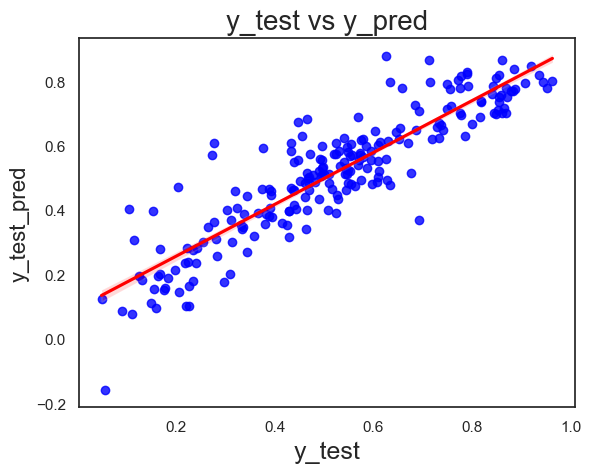

In [84]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

### Model Summary:
1. **Model Fit:**
   - **R-squared (Train):** 0.834
   - **Adjusted R-squared (Train):** 0.830
   - **R-squared (Test):** 0.804
   - **Adjusted R-squared (Test):** 0.7896

These values indicate that approximately 83.4% of the variance in the dependent variable (total_count) is explained by the model in the training set, and about 80.4% in the test set. The slight decrease in the test R-squared suggests a good generalization with minimal overfitting.

2. **Model Statistics:**
   - **F-statistic:** 227.7 (with a p-value of 2.87e-186)

   The F-statistic indicates that the model is statistically significant, meaning that the predictor variables, taken together, significantly predict the dependent variable.

### Coefficients:
All predictor variables are statistically significant (p < 0.05).

### Multicollinearity:
- **VIF Values:** All below 5, with the highest VIF for temperature (4.63) and windspeed (4.01), suggesting that multicollinearity is not a serious concern in this model.

### What Makes People Use Bikes More:

1. **Weather Impact:**
   - **Warm Weather:** People like biking when it's warm.
   - **Wind:** High wind makes biking less enjoyable.

2. **Seasonal Changes:**
   - **Spring:** Biking goes down a bit.
   - **Winter:** More people bike than we might think.

3. **Monthly Differences:**
   - **January & July:** Fewer people bike these months.
   - **September:** More biking happens here.

4. **Holiday Effect:**
   - **Holidays:** Bike use drops because routines change.

5. **Long-Term Trend:**
   - **More Popular:** Biking is getting more popular over time.

### Suggestions:

- **Weather :** Encourage biking on sunny days and think about how wind affects rides.
  
- **Seasons:** Focus on promoting biking in winter and find ways to boost interest in spring.
  
- **Month:** Create fun events or deals during slow months like January and July, and celebrate the busier times in September.

- **Holiday:** Plan activities that keep people interested in biking even on holidays.